# Prerequisite: start the cluster

To use this notebook, we need an A100 VM and a TPU v5litepod-8 VM.
Both VMs should be reachable via IP address to each other.
This notebook is run on the A100 VM, which is also the ray head node.

Starting the head node:

```sh
ray start --head --port=6379
```

Joining the ray cluster from the TPU VM:

```sh
ray start --address=$GPU_IP:6379
```

In [1]:
import ray

ray.init()

2025-04-22 17:16:19,136	INFO worker.py:1660 -- Connecting to existing Ray cluster at address: 10.128.0.32:6379...
2025-04-22 17:16:19,153	INFO worker.py:1843 -- Connected to Ray cluster. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.14
Ray version:,2.44.1
Dashboard:,http://127.0.0.1:8265


(TpuResNetWorker pid=902698, ip=10.138.0.2) WARNING:root:libtpu.so and TPU device found. Setting PJRT_DEVICE=TPU.


(pid=, ip=10.138.0.2) Log file created at: 2025/04/22 10:17:24
(pid=, ip=10.138.0.2) Running on machine: t1v-n-8ed780ed-w-0
(pid=, ip=10.138.0.2) Binary: Built on Jan 24 2025 17:49:30 (1737769770)
(pid=, ip=10.138.0.2) Binary: Built at cloud-tpus-runtime-release-tool@lmbco37.prod.google.com:/google/src/cloud/buildrabbit-username/buildrabbit-client/g3     
(pid=, ip=10.138.0.2) Binary: Built for gcc-4.X.Y-crosstool-v18-llvm-grtev4-k8.k8
(pid=, ip=10.138.0.2) Log line format: [IWEF]mmdd hh:mm:ss.uuuuuu threadid file:line] msg
(pid=, ip=10.138.0.2) I0422 10:17:24.401136  902698 b295d63588a.cc:733] Linux version 6.5.0-1013-gcp (buildd@lcy02-amd64-064) (x86_64-linux-gnu-gcc-12 (Ubuntu 12.3.0-1ubuntu1~22.04) 12.3.0, GNU ld (GNU Binutils for Ubuntu) 2.38) #13~22.04.1-Ubuntu SMP Wed Jan 24 23:39:40 UTC 2024
(pid=, ip=10.138.0.2) I0422 10:17:24.411444  902698 b295d63588a.cc:815] Process id 902698
(pid=, ip=10.138.0.2) I0422 10:17:24.411461  902698 b295d63588a.cc:820] Current working directory /

(TpuResNetWorker pid=905340, ip=10.138.0.2) WARNING:root:libtpu.so and TPU device found. Setting PJRT_DEVICE=TPU.


(pid=, ip=10.138.0.2) Log file created at: 2025/04/22 10:17:46
(pid=, ip=10.138.0.2) Running on machine: t1v-n-8ed780ed-w-0
(pid=, ip=10.138.0.2) Binary: Built on Jan 24 2025 17:49:30 (1737769770)
(pid=, ip=10.138.0.2) Binary: Built at cloud-tpus-runtime-release-tool@lmbco37.prod.google.com:/google/src/cloud/buildrabbit-username/buildrabbit-client/g3     
(pid=, ip=10.138.0.2) Binary: Built for gcc-4.X.Y-crosstool-v18-llvm-grtev4-k8.k8
(pid=, ip=10.138.0.2) Log line format: [IWEF]mmdd hh:mm:ss.uuuuuu threadid file:line] msg
(pid=, ip=10.138.0.2) I0422 10:17:46.769112  905340 b295d63588a.cc:733] Linux version 6.5.0-1013-gcp (buildd@lcy02-amd64-064) (x86_64-linux-gnu-gcc-12 (Ubuntu 12.3.0-1ubuntu1~22.04) 12.3.0, GNU ld (GNU Binutils for Ubuntu) 2.38) #13~22.04.1-Ubuntu SMP Wed Jan 24 23:39:40 UTC 2024
(pid=, ip=10.138.0.2) I0422 10:17:46.779495  905340 b295d63588a.cc:815] Process id 905340
(pid=, ip=10.138.0.2) I0422 10:17:46.779512  905340 b295d63588a.cc:820] Current working directory /

(GpuResNetWorker pid=3518420) /pytorch/aten/src/ATen/native/cuda/Loss.cu:250: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [2,0,0] Assertion `t >= 0 && t < n_classes` failed.
(GpuResNetWorker pid=3518420) /pytorch/aten/src/ATen/native/cuda/Loss.cu:250: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [3,0,0] Assertion `t >= 0 && t < n_classes` failed.
(GpuResNetWorker pid=3518420) /pytorch/aten/src/ATen/native/cuda/Loss.cu:250: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [4,0,0] Assertion `t >= 0 && t < n_classes` failed.
(GpuResNetWorker pid=3518420) /pytorch/aten/src/ATen/native/cuda/Loss.cu:250: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [5,0,0] Assertion `t >= 0 && t < n_classes` failed.
(GpuResNetWorker pid=3518420) /pytorch/aten/src/ATen/native/cuda/Loss.cu:250: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [6,0,0] Assertion `t >= 0 && t < n_classes` failed.
(GpuResNetWorker pid=3518420) 

(pid=, ip=10.138.0.2) c8_compiler_base.cc:6679] END_TO_END stage duration: 6.35891340025s
(pid=, ip=10.138.0.2) I0422 10:18:09.145919  905340 2a886c8_compiler_base.cc:6104] XLA::TPU running hlo passes for 3,592 instructions, modules: SyncTensorsGraph.3627
(pid=, ip=10.138.0.2) I0422 10:18:09.145935  905340 2a886c8_compiler_base.cc:6161] Initial HLO module: SyncTensorsGraph.3627 instructions: 3,592 fingerprint: 
(pid=, ip=10.138.0.2) I0422 10:18:09.170751  905340 2a886c8_compiler_base.cc:6229] HLO optimizing module: SyncTensorsGraph.3627 instructions: 6,321
(pid=, ip=10.138.0.2) I0422 10:18:09.170758  905340 2a886c8_compiler_base.cc:6244] XLA::TPU HLO optimization
(pid=, ip=10.138.0.2) I0422 10:18:09.618403  905340 2a886c8_compiler_base.cc:5347] XLA::TPU HLO PostOptimizationPipeline
(pid=, ip=10.138.0.2) I0422 10:18:09.954196  905340 2a886c8_compiler_base.cc:6300] HLO_PASSES stage duration: 809.58495725ms
(pid=, ip=10.138.0.2) I0422 10:18:10.016022  908181 memory_space_assignment_util.c

(TpuResNetWorker pid=916305, ip=10.138.0.2) WARNING:root:libtpu.so and TPU device found. Setting PJRT_DEVICE=TPU.


(pid=, ip=10.138.0.2) Log file created at: 2025/04/22 10:19:43
(pid=, ip=10.138.0.2) Running on machine: t1v-n-8ed780ed-w-0
(pid=, ip=10.138.0.2) Binary: Built on Jan 24 2025 17:49:30 (1737769770)
(pid=, ip=10.138.0.2) Binary: Built at cloud-tpus-runtime-release-tool@lmbco37.prod.google.com:/google/src/cloud/buildrabbit-username/buildrabbit-client/g3     
(pid=, ip=10.138.0.2) Binary: Built for gcc-4.X.Y-crosstool-v18-llvm-grtev4-k8.k8
(pid=, ip=10.138.0.2) Log line format: [IWEF]mmdd hh:mm:ss.uuuuuu threadid file:line] msg
(pid=, ip=10.138.0.2) I0422 10:19:43.177840  916305 b295d63588a.cc:733] Linux version 6.5.0-1013-gcp (buildd@lcy02-amd64-064) (x86_64-linux-gnu-gcc-12 (Ubuntu 12.3.0-1ubuntu1~22.04) 12.3.0, GNU ld (GNU Binutils for Ubuntu) 2.38) #13~22.04.1-Ubuntu SMP Wed Jan 24 23:39:40 UTC 2024
(pid=, ip=10.138.0.2) I0422 10:19:43.188756  916305 b295d63588a.cc:815] Process id 916305
(pid=, ip=10.138.0.2) I0422 10:19:43.188785  916305 b295d63588a.cc:820] Current working directory /

(TpuResNetWorker pid=1012284, ip=10.138.0.2) WARNING:root:libtpu.so and TPU device found. Setting PJRT_DEVICE=TPU.


(pid=, ip=10.138.0.2) Log file created at: 2025/04/22 10:38:18
(pid=, ip=10.138.0.2) Running on machine: t1v-n-8ed780ed-w-0
(pid=, ip=10.138.0.2) Binary: Built on Jan 24 2025 17:49:30 (1737769770)
(pid=, ip=10.138.0.2) Binary: Built at cloud-tpus-runtime-release-tool@lmbco37.prod.google.com:/google/src/cloud/buildrabbit-username/buildrabbit-client/g3     
(pid=, ip=10.138.0.2) Binary: Built for gcc-4.X.Y-crosstool-v18-llvm-grtev4-k8.k8
(pid=, ip=10.138.0.2) Log line format: [IWEF]mmdd hh:mm:ss.uuuuuu threadid file:line] msg
(pid=, ip=10.138.0.2) I0422 10:38:18.305000 1012284 b295d63588a.cc:733] Linux version 6.5.0-1013-gcp (buildd@lcy02-amd64-064) (x86_64-linux-gnu-gcc-12 (Ubuntu 12.3.0-1ubuntu1~22.04) 12.3.0, GNU ld (GNU Binutils for Ubuntu) 2.38) #13~22.04.1-Ubuntu SMP Wed Jan 24 23:39:40 UTC 2024
(pid=, ip=10.138.0.2) I0422 10:38:18.315002 1012284 b295d63588a.cc:815] Process id 1012284
(pid=, ip=10.138.0.2) I0422 10:38:18.315018 1012284 b295d63588a.cc:820] Current working directory 

In [2]:
import torch
import numpy as np
from torch.utils.data import DataLoader, default_collate
from torchvision import datasets, models, tv_tensors

In [3]:
# Download dataset
def download_dataset(split="test"):
  from torchvision.transforms import v2
  from datasets import load_dataset
  train_dataset = load_dataset("flwrlabs/celeba", split=split, trust_remote_code=True, cache_dir='cache')
  train_dataset = train_dataset.with_format("torch")
  CLASSES = train_dataset.unique('celeb_id')  # type: ignore
  NUM_CLASSES = len(CLASSES)

  print("Number of classes:", NUM_CLASSES)

  def transform_example(ex):
      assert isinstance(CLASSES, list)
      imgs = ex["image"]
      labels = ex["celeb_id"]
      transform_fct = v2.Compose([
          v2.PILToTensor(),
          v2.ToDtype(torch.float32, scale=True),
          v2.Resize(size=(224, 224)),
          v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
      ])
      img_bbox_pairs = [transform_fct(img, label) for img, label in zip(imgs, labels)]

      return {"image": [img for img, label in img_bbox_pairs],
              "label": [CLASSES.index(label) for img, label in img_bbox_pairs]}

  train_dataset = train_dataset.map(transform_example, num_proc=4, batched=True, writer_batch_size=4_000, load_from_cache_file=True)  # type: ignore
  return train_dataset, NUM_CLASSES

train_dataset, NUM_CLASSES = download_dataset()

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Number of classes: 1000


In [4]:
print("Preparing dataset loader...")
train_loader = DataLoader(train_dataset, batch_size=64, num_workers=0, shuffle=False)  # type: ignore

Preparing dataset loader...


In [17]:
import os
from typing import Any
from copy import deepcopy


class BaseActor:
  
  def __init__(self, model, device):
    self.model = model
    self.device = device
    self.num_ftrs = model.fc.in_features
    self.pid = os.getpid()
    self.cwd = os.getcwd()
    
    import torch.nn as nn
    self.loss_fct = nn.CrossEntropyLoss()

  def get_cwd(self) -> str:
    """Returns the current working directory of the actor."""
    return self.cwd

  def get_num_features(self) -> int:
    """Returns the number of features in the model."""
    return self.num_ftrs
  
  def reset_classifier(
      self,
      fc_state_dict: dict[str, Any],
      conv1_state_dict: dict[str, Any],
      bn1_state_dict: dict[str, Any]
    ) -> bool:
    """Replaces the weights of fc, conv1, and bn1 layers."""
    import torch.nn as nn
    try:
      # Ensure layers exist before loading state dict
      if hasattr(self.model, 'fc') and self.model.fc is not None:
          num_classes = fc_state_dict['weight'].shape[0]
          self.model.fc = nn.Linear(self.num_ftrs, num_classes)
          self.model.fc.load_state_dict(fc_state_dict, assign=True)
      else:
          raise ValueError("fc layer not found or is None in the model.")

      if hasattr(self.model, 'conv1') and self.model.conv1 is not None:
          self.model.conv1.load_state_dict(conv1_state_dict, assign=True)
      else:
          raise ValueError("conv1 layer not found or is None in the model.")

      if hasattr(self.model, 'bn1') and self.model.bn1 is not None:
          self.model.bn1.load_state_dict(bn1_state_dict, assign=True)
      else:
          raise ValueError("bn1 layer not found or is None in the model.")

      self.model.to(self.device)
      return True
    except Exception as e:
      print(f"Failed to reset classifier layers: {e}")
      raise e
  
  def init_optimizer(self, lr: float):
    import torch.optim as optim
    self.optimizer = optim.Adam(self.model.parameters(), lr=lr)

  def get_state_dict(self) -> dict[str, Any]:
    """Returns the state dict of the model."""
    return deepcopy(self.model).to('cpu').state_dict()

  def run_eval_pass(self, input_tensor: torch.Tensor) -> torch.Tensor:
    """Runs a forward pass using the resident model."""
    self.framework_pre_hook()
    input_tensor_xpu = input_tensor.to(self.device)
    self.model.eval()
    with torch.no_grad():
      output = self.model(input_tensor_xpu)
    self.framework_post_hook()
    return output.cpu()
  
  def run_training_pass(self, input_tensor: torch.Tensor, labels: torch.Tensor) -> tuple[float, dict]:
    self.framework_pre_hook()
    self.model.train()
    input_tensor_xpu = input_tensor.to(self.device)
    labels_xpu = labels.to(self.device)
    self.optimizer.zero_grad()
    output = self.model(input_tensor_xpu)
    loss = self.loss_fct(output, labels_xpu)
    loss_float = loss.detach().cpu().item()
    loss.backward()
    self.optimizer.step()
    self.framework_post_hook()
    grad_dict = self.get_grad_dict()
    return loss_float, grad_dict

  def run_training_epoch(self, batch_size=512, training_split='test', dataloader_seed=0):
    import torch
    import numpy as np
    import random
    from torch.utils.data import DataLoader
    from training_util import seed_worker
    torch.manual_seed(dataloader_seed)
    np.random.seed(dataloader_seed)
    random.seed(dataloader_seed)
    train_dataset, NUM_CLASSES = download_dataset(split=training_split)
    train_loader = DataLoader(
      train_dataset,  # type: ignore
      batch_size=batch_size,
      num_workers=8,
      shuffle=True,
      worker_init_fn=seed_worker,
      in_order=True,
      generator=torch.Generator(),
      multiprocessing_context="spawn",
      drop_last=True,
      persistent_workers=False,
    )
    for i, batch in enumerate(train_loader):
      self.framework_pre_hook()
      images = batch["image"]
      labels = batch["label"]
      labels_checksum = self.checksum_labels(labels)
      images = images.to(self.device)
      labels = labels.to(self.device)
      loss, _grad_dict = self.run_training_pass(images, labels)
      self.framework_post_hook()
      yield i, loss, labels_checksum
  
  def checksum_labels(self, labels: torch.Tensor) -> int:
    """Returns the checksum of the labels tensor."""
    numel = labels.numel()
    if numel == 0:
      label_checksum = 0
    elif numel == 1:
      label_checksum = hash(labels.item())
    else:
      rolled_labels = torch.roll(labels, shifts=1, dims=0)
      xor_result = torch.bitwise_xor(labels, rolled_labels)
      checksum_tensor = torch.sum(xor_result.long())
      label_checksum = int(checksum_tensor.item())
    return label_checksum
  
  def get_grad_dict(self):
    grad_dict = {}
    for name, param in self.model.named_parameters():
      if param.grad is not None:
        grad_dict[name] = param.grad.detach().cpu().clone()
      elif param.requires_grad:
        grad_dict[name] = None
    return grad_dict

  def print_model_architecture(self) -> str:
    import io
    with io.StringIO() as output:
      print(self.model, file=output)
      return output.getvalue()

  def framework_pre_hook(self): pass
  def framework_post_hook(self): pass


# ==========================
# Actor for GPU Execution
# ==========================
@ray.remote(num_gpus=1)
class GpuResNetWorker(BaseActor):
  def __init__(self):
    import torch
    if not torch.cuda.is_available():
      raise RuntimeError("CUDA not available for GpuResNetWorker")
    device = torch.device("cuda")
    # Load a pretrained ResNet18 model
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    model = model.to(device)
    super().__init__(model, device)

  def get_device_info(self) -> str:
    return f"GPU Actor (PID: {self.pid}) using {self.device} ({torch.cuda.get_device_name(0)})"
  

# ==========================
# Actor for PyTorch/XLA TPU Execution
# ==========================
@ray.remote(resources={"TPU": 1})
class TpuResNetWorker(BaseActor):
  def __init__(self):
    import torch
    import torch.nn as nn

    try:
      import torch_xla
      import torch_xla.core.xla_model as xm
    except ImportError:
      raise ImportError("torch_xla is required for TpuResNetWorker")

    device = torch_xla.device()
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    model = model.to(device)
    torch_xla.sync()
    super().__init__(model, device)
  
  def get_device_info(self) -> str:
    import torch_xla
    return f"TPU Actor (PID: {self.pid}) using {self.device} ({torch_xla.tpu.get_tpu_env()['ACCELERATOR_TYPE']})"
  
  def set_matmul_precision(self, precision: str):
    import torch_xla
    torch_xla._XLAC._xla_set_mat_mul_precision(precision)

  def framework_pre_hook(self):
    import torch_xla
    torch_xla.sync()

  def framework_post_hook(self):
    import torch_xla
    torch_xla.sync()


# ==========================
# Actor for torchax TPU Execution
# ==========================
@ray.remote(resources={"TPU": 1})
class TorchaxResNetWorker(BaseActor):
  def __init__(self):
    import torch
    import torch.nn as nn

    try:
      import torchax
      torchax.enable_globally()
    except ImportError:
      raise ImportError("torchax is required for TpuResNetWorker")

    device = 'jax'
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    model = model.to(device)
    super().__init__(model, device)
  
  def get_device_info(self) -> str:
    import jax
    return f"torchax TPU Actor (PID: {self.pid}) using {self.device} ({jax.devices()[0]})"
  
  def set_matmul_precision(self, precision: str):
    import torchax
    import jax
    match precision:
      case "default":
        torchax.enable_performance_mode()
      case "high":
        torchax.enable_accuracy_mode()
        jax.config.update('jax_default_matmul_precision', precision)
      case "highest":
        torchax.enable_accuracy_mode()
        jax.config.update('jax_default_matmul_precision', precision)
      case _:
        raise ValueError(f"Unknown precision level: {precision}")


Define functions to get an actor for each sw/hw combination

In [18]:
def get_gpu_actor():
  gpu_actor: Any = GpuResNetWorker.remote()
  gpu_info = ray.get(gpu_actor.get_device_info.remote())
  print(gpu_info)
  return gpu_actor

def get_tpu_actor():
  tpu_actor: Any = TpuResNetWorker.remote()
  tpu_info = ray.get(tpu_actor.get_device_info.remote())
  print(tpu_info)
  return tpu_actor

def get_torchax_actor():
  torchax_actor: Any = TorchaxResNetWorker.remote()
  torchax_info = ray.get(torchax_actor.get_device_info.remote())
  print(torchax_info)
  return torchax_actor

In [19]:
gpu_actor = get_gpu_actor()
print(ray.get(gpu_actor.print_model_architecture.remote()))
print(ray.get(gpu_actor.get_cwd.remote()))

GPU Actor (PID: 3541140) using cuda (NVIDIA A100-SXM4-80GB)
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

## Inference tests

Now we try different actors under different precision, and compare them to GPU

- GPU, PyTorch/XLA TPU, torchax TPU
- XLA precision: default, high, highest
- Metrics: logits delta, top-1 acc, top-5 acc

Reference on TPU matmul precision:

- https://docs.jax.dev/en/latest/jax.lax.html#jax.lax.Precision
- https://arxiv.org/pdf/1904.06376
  * breaks each fp32 into 3 bf16
  * 3 term algorithm corresponds to "high"
  * 6 term algorithm corresponds to "highest"
  * in principle, there exists a 9 term algorithm (all 3x3 terms) that is numerically exact. but not exposed here.

In [7]:
from dataclasses import dataclass
from tqdm import tqdm

class ModelDictMismatchError(ValueError):
  """Custom error for model dictionary mismatches."""

  def __init__(self, message, gpu_dict, tpu_dict):
    super().__init__(message)
    self.gpu_dict = gpu_dict
    self.tpu_dict = tpu_dict
    
  def get_abs_diff(self, key):
    gpu_tensor = self.gpu_dict[key]
    tpu_tensor = self.tpu_dict[key]
    return torch.abs(gpu_tensor - tpu_tensor).cpu().numpy()
  
  def get_pct_diff(self, key):
    gpu_tensor = self.gpu_dict[key]
    tpu_tensor = self.tpu_dict[key]
    abs_diff = torch.abs(gpu_tensor - tpu_tensor)
    pct_diff = 100.0 * abs_diff / (torch.abs(gpu_tensor) + 1e-9)
    return pct_diff.cpu().numpy()


def check_model_dicts_are_the_same(gpu_actor, tpu_actor):
  gpu_state_dict: dict = ray.get(gpu_actor.get_state_dict.remote())
  tpu_state_dict: dict = ray.get(tpu_actor.get_state_dict.remote())
  check_dicts(gpu_state_dict, tpu_state_dict, "state")
  

def check_model_grads_are_the_same(gpu_grads, tpu_grads):
  check_dicts(gpu_grads, tpu_grads, "grad")


def check_dicts(gpu_state_dict, tpu_state_dict, name):
  # Check that both state dicts have the same keys
  assert gpu_state_dict.keys() == tpu_state_dict.keys(), f"{name} dict keys don't match!"

  # Compare all tensors in the state dicts
  all_close = True
  max_diff = 0.0
  max_pct_diff = 0.0
  max_med_pct_diff = 0.0
  problematic_layers = []

  for key in gpu_state_dict.keys():
    gpu_tensor = gpu_state_dict[key]
    tpu_tensor = tpu_state_dict[key]
    
    if not torch.equal(gpu_tensor, tpu_tensor):
      elem_diff = torch.abs(gpu_tensor - tpu_tensor)
      diff = torch.max(elem_diff).item()
      pct_diff = elem_diff / (torch.abs(gpu_tensor) + 1e-9) * 100.0
      max_diff = max(max_diff, diff)
      max_pct_diff = max(max_pct_diff, pct_diff.max().item())
      med_pct_diff = float(pct_diff.median().item())
      max_med_pct_diff = max(max_med_pct_diff, med_pct_diff)
      problematic_layers.append((key, diff, pct_diff.max().item(), med_pct_diff))
      all_close = False

  if all_close:
    print(f"✅ GPU and TPU models have identical {name} dicts")
  else:
    print(f"❌ Found differences in {name} dicts:")
    print(f"Maximum absolute difference: {max_diff:.6f}")
    print(f"Maximum percentage difference: {max_pct_diff:.6f}%")
    print(f"Maximum median-of-layer percentage difference: {max_med_pct_diff:.6f}%")
    print("\nLayers with differences:")
    for layer, diff, pct_diff, med_pct_diff in problematic_layers:
      print(f"- {layer}: max diff = {diff:.6f}, max pct diff = {pct_diff:.3f}%, med pct diff = {med_pct_diff:.3f}%")
    raise ModelDictMismatchError(f"{name} dicts are not identical!", gpu_state_dict, tpu_state_dict)


@dataclass
class Metrics:
  max_abs_diff: float
  avg_abs_diff: float
  med_abs_diff: float
  max_pct_diff: float
  avg_pct_diff: float
  med_pct_diff: float
  avg_softmax_abs_diff: float
  top1_acc: float
  top5_acc: float


def test_eval_run(gpu_actor, tpu_actor) -> Metrics:
  abs_deltas = []  # Store absolute differences
  pct_deltas = []  # Store percentage differences
  abs_softmax_deltas = []  # Store softmax absolute differences
  gpu_correct_top1 = 0
  gpu_correct_top5 = 0
  tpu_correct_top1 = 0
  tpu_correct_top5 = 0
  total = 0

  for _, data in tqdm(zip(range(20), train_loader)):
    input_ref = ray.put(data['image'])
    labels = data['label']
    gpu_future = gpu_actor.run_eval_pass.remote(input_ref)
    tpu_future = tpu_actor.run_eval_pass.remote(input_ref)
    gpu_output: torch.Tensor = ray.get(gpu_future)
    tpu_output: torch.Tensor = ray.get(tpu_future)

    assert gpu_output.shape == (data['image'].size(0), 1000)
    if gpu_output.shape != tpu_output.shape:
      raise ValueError("Output shapes differ between GPU and TPU!")

    # Absolute difference
    abs_diff = torch.abs(gpu_output - tpu_output)
    abs_softmax_diff = torch.abs(torch.nn.functional.softmax(gpu_output, dim=1) - torch.nn.functional.softmax(tpu_output, dim=1))
    # Percentage difference calculation
    # Using epsilon to avoid division by zero
    epsilon = 1e-9
    pct_diff = 100.0 * abs_diff / (torch.abs(gpu_output) + epsilon)
    
    abs_deltas.append(abs_diff)
    pct_deltas.append(pct_diff)
    abs_softmax_deltas.append(abs_softmax_diff)
    
    # Calculate top-1 and top-5 accuracy
    _, gpu_pred = gpu_output.topk(5, 1, True, True)
    _, tpu_pred = tpu_output.topk(5, 1, True, True)
    gpu_pred = gpu_pred.cpu()
    tpu_pred = tpu_pred.cpu()
    labels = labels.view(-1, 1)

    # Top-1 accuracy
    gpu_correct_top1 += gpu_pred[:, 0].eq(labels).sum().item()
    tpu_correct_top1 += tpu_pred[:, 0].eq(labels).sum().item()
    
    # Top-5 accuracy
    gpu_correct = labels.eq(gpu_pred).any(dim=1).sum().item()
    tpu_correct = labels.eq(tpu_pred).any(dim=1).sum().item()
    gpu_correct_top5 += gpu_correct
    tpu_correct_top5 += tpu_correct
    
    total += labels.size(0)
  
  # Calculate final metrics
  gpu_top1_acc = 100.0 * gpu_correct_top1 / total
  gpu_top5_acc = 100.0 * gpu_correct_top5 / total
  tpu_top1_acc = 100.0 * tpu_correct_top1 / total 
  tpu_top5_acc = 100.0 * tpu_correct_top5 / total

  print(f"""Absolute difference between GPU and TPU outputs:
  Max: {np.max(abs_deltas):.6f}
  Median: {np.median(abs_deltas):.6f}
  Mean: {np.mean(abs_deltas):.6f}
  """)
  
  print(f"""Percentage difference between GPU and TPU outputs:
  Max: {np.max(pct_deltas):.2f}%
  Median: {np.median(pct_deltas):.2f}%
  Mean: {np.mean(pct_deltas):.2f}%
  """)

  print(f"""Accuracy metrics:
  GPU Top-1: {gpu_top1_acc:.2f}%
  GPU Top-5: {gpu_top5_acc:.2f}%
  TPU Top-1: {tpu_top1_acc:.2f}%
  TPU Top-5: {tpu_top5_acc:.2f}%
  """)
  
  return Metrics(
    max_abs_diff=float(np.max(abs_deltas)),
    avg_abs_diff=float(np.mean(abs_deltas)),
    med_abs_diff=float(np.median(abs_deltas)),
    max_pct_diff=float(np.max(pct_deltas)),
    avg_pct_diff=float(np.mean(pct_deltas)),
    med_pct_diff=float(np.median(pct_deltas)),
    avg_softmax_abs_diff=float(np.mean(abs_softmax_deltas)),
    top1_acc=abs(gpu_top1_acc - tpu_top1_acc),
    top5_acc=abs(gpu_top5_acc - tpu_top5_acc),
  )


In [11]:
inference_results = {}

for framework, factory in [
  ("torch_xla", get_tpu_actor),
  ("torchax", get_torchax_actor),
]:
  for precision in [
    "default", "high", "highest",
  ]:
    if framework == "torchax" and precision != "default":
      # Workaround torchax crash in C++ with unsymbolized stack trace
      continue
    print()
    print(f"---- Testing {framework} with precision {precision}")
    actor = factory()
    ray.get(actor.set_matmul_precision.remote(precision))
    metrics = test_eval_run(gpu_actor, actor)
    check_model_dicts_are_the_same(gpu_actor, actor)
    print(f"Metrics: {metrics}")
    inference_results[f'{framework}_{precision}'] = metrics
    ray.kill(actor)


---- Testing torch_xla with precision default
TPU Actor (PID: 2919482) using xla:0 (v5litepod-8)


20it [00:45,  2.28s/it]


Absolute difference between GPU and TPU outputs:
  Max: 0.134073
  Median: 0.010917
  Mean: 0.013391
  
Percentage difference between GPU and TPU outputs:
  Max: 28397390.00%
  Median: 0.46%
  Mean: 29.55%
  
Accuracy metrics:
  GPU Top-1: 0.00%
  GPU Top-5: 0.00%
  TPU Top-1: 0.00%
  TPU Top-5: 0.00%
  
✅ GPU and TPU models have identical state dicts
Metrics: Metrics(max_abs_diff=0.13407325744628906, avg_abs_diff=0.013391024433076382, med_abs_diff=0.010917305946350098, max_pct_diff=28397390.0, avg_pct_diff=29.546239852905273, med_pct_diff=0.45894449949264526, avg_softmax_abs_diff=1.067616085492773e-05, top1_acc=0.0, top5_acc=0.0)

---- Testing torch_xla with precision high
TPU Actor (PID: 2924007) using xla:0 (v5litepod-8)


20it [00:54,  2.74s/it]


Absolute difference between GPU and TPU outputs:
  Max: 0.021862
  Median: 0.001424
  Mean: 0.001756
  
Percentage difference between GPU and TPU outputs:
  Max: 553106.81%
  Median: 0.06%
  Mean: 1.32%
  
Accuracy metrics:
  GPU Top-1: 0.00%
  GPU Top-5: 0.00%
  TPU Top-1: 0.00%
  TPU Top-5: 0.00%
  
✅ GPU and TPU models have identical state dicts
Metrics: Metrics(max_abs_diff=0.021862030029296875, avg_abs_diff=0.00175559613853693, med_abs_diff=0.0014238357543945312, max_pct_diff=553106.8125, avg_pct_diff=1.3203604221343994, med_pct_diff=0.060204364359378815, avg_softmax_abs_diff=1.452519541089714e-06, top1_acc=0.0, top5_acc=0.0)

---- Testing torch_xla with precision highest
TPU Actor (PID: 2928499) using xla:0 (v5litepod-8)


20it [00:53,  2.67s/it]


Absolute difference between GPU and TPU outputs:
  Max: 0.020750
  Median: 0.001318
  Mean: 0.001635
  
Percentage difference between GPU and TPU outputs:
  Max: 766380.75%
  Median: 0.06%
  Mean: 1.43%
  
Accuracy metrics:
  GPU Top-1: 0.00%
  GPU Top-5: 0.00%
  TPU Top-1: 0.00%
  TPU Top-5: 0.00%
  
✅ GPU and TPU models have identical state dicts
Metrics: Metrics(max_abs_diff=0.020750045776367188, avg_abs_diff=0.0016349849756807089, med_abs_diff=0.0013184547424316406, max_pct_diff=766380.75, avg_pct_diff=1.4347858428955078, med_pct_diff=0.05593852326273918, avg_softmax_abs_diff=1.2930415778100723e-06, top1_acc=0.0, top5_acc=0.0)

---- Testing torchax with precision default
torchax TPU Actor (PID: 2932896) using jax (TPU_0(process=0,(0,0,0,0)))


20it [01:00,  3.04s/it]


Absolute difference between GPU and TPU outputs:
  Max: 0.142362
  Median: 0.010935
  Mean: 0.013422
  
Percentage difference between GPU and TPU outputs:
  Max: 32678184.00%
  Median: 0.46%
  Mean: 32.60%
  
Accuracy metrics:
  GPU Top-1: 0.00%
  GPU Top-5: 0.00%
  TPU Top-1: 0.00%
  TPU Top-5: 0.00%
  
✅ GPU and TPU models have identical state dicts
Metrics: Metrics(max_abs_diff=0.14236164093017578, avg_abs_diff=0.013421942479908466, med_abs_diff=0.010934829711914062, max_pct_diff=32678184.0, avg_pct_diff=32.601715087890625, med_pct_diff=0.46012210845947266, avg_softmax_abs_diff=1.0664482033462264e-05, top1_acc=0.0, top5_acc=0.0)


In [12]:
import pandas as pd
from dataclasses import asdict

metrics_dict = {}
for framework_precision, metrics in inference_results.items():
    metrics_dict[framework_precision] = asdict(metrics)

df = pd.DataFrame(metrics_dict).T
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))
df = df.sort_index()
print("\nInference Results:")
display(df)


Inference Results:


,max_abs_diff,avg_abs_diff,med_abs_diff,max_pct_diff,avg_pct_diff,med_pct_diff,avg_softmax_abs_diff,top1_acc,top5_acc
torch_xla_default,0.134073,0.013391,0.010917,28397390.000000,29.546240,0.458944,0.000011,0.000000,0.000000
torch_xla_high,0.021862,0.001756,0.001424,553106.812500,1.320360,0.060204,0.000001,0.000000,0.000000
torch_xla_highest,0.020750,0.001635,0.001318,766380.750000,1.434786,0.055939,0.000001,0.000000,0.000000
torchax_default,0.142362,0.013422,0.010935,32678184.000000,32.601715,0.460122,0.000011,0.000000,0.000000


Conclusion: there are minute numerical differences between TPU/GPU
(0.45% median percentage logits delta), that diminishes when enabling higher
numerical accuracy (0.06% median percentage logits delta).

The Top-1 and Top-5 accuracy are 0 because we loaded an ImageNet model and
evaluated on CelebA. Once we start training, it will reveal more information.

## Training tests

Given the same dataset, let's train the model for 1 step on both TPU and GPU.

Test each layer in a training run. Compare their weight delta after one optimizer
step, and compare their gradients too.

In [11]:
# This will reliably reset every actor to the same random state.
class ActorResetter:
  def __init__(self, num_classes=NUM_CLASSES):
    import numpy as np
    import torch
    import torch.nn as nn
    
    np.random.seed(42)
    torch.manual_seed(42)
    
    num_ftrs: int = ray.get(gpu_actor.get_num_features.remote())
    self.num_ftrs = num_ftrs
    self.fc = nn.Linear(num_ftrs, num_classes)
    
    # These are not the classifier, but still reasonable to reset because the input data
    # domain distribution has changed.
    self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.bn1 = nn.BatchNorm2d(64)
  
  def reset_classifier_layers_to_identical_random(self, actor):
    assert self.num_ftrs == ray.get(actor.get_num_features.remote()), "Number of features mismatch"

    assert ray.get(actor.reset_classifier.remote(
        self.fc.state_dict(),
        self.conv1.state_dict(),
        self.bn1.state_dict()
      )), f"ACTORS {actor} failed to reset classifier layers."

actor_resetter = ActorResetter()

In [ ]:
# Reset the model weights on all actors.
def reset_all_actors(gpu_actor, tpu_actor, actor_resetter=actor_resetter):
  if gpu_actor is not None:
    ray.kill(gpu_actor)
  if tpu_actor is not None:
    ray.kill(tpu_actor)
  gpu_actor = get_gpu_actor()
  tpu_actor = get_tpu_actor()
  actor_resetter.reset_classifier_layers_to_identical_random(gpu_actor)
  actor_resetter.reset_classifier_layers_to_identical_random(tpu_actor)
  check_model_dicts_are_the_same(gpu_actor, tpu_actor)
  return gpu_actor, tpu_actor

gpu_actor, tpu_actor = reset_all_actors(gpu_actor, tpu_actor=None)
ray.get(tpu_actor.set_matmul_precision.remote('default'))

GPU Actor (PID: 3518044) using cuda (NVIDIA A100-SXM4-80GB)
TPU Actor (PID: 902698) using xla:0 (v5litepod-8)
✅ GPU and TPU models have identical state dicts


In [13]:
# Now let's train them for one step.
def test_train_one_step():
  one_batch = next(iter(train_loader))
  input_ref = ray.put(one_batch['image'])
  labels = ray.put(one_batch['label'])
  ray.get(gpu_actor.init_optimizer.remote(0.001))
  ray.get(tpu_actor.init_optimizer.remote(0.001))
  gpu_loss, gpu_grads = ray.get(gpu_actor.run_training_pass.remote(input_ref, labels))
  tpu_loss, tpu_grads = ray.get(tpu_actor.run_training_pass.remote(input_ref, labels))
  print(f"GPU Loss: {gpu_loss:.6f}")
  print(f"TPU Loss: {tpu_loss:.6f}")
  # Check grads
  try:
    check_model_grads_are_the_same(gpu_grads, tpu_grads)
  except ModelDictMismatchError as e:
    print(e)
    plot_weight_differences(e, name="Gradient")
  # Check weights
  try:
    check_model_dicts_are_the_same(gpu_actor, tpu_actor)
  except ModelDictMismatchError as e:
    print(e)
    plot_weight_differences(e)


# Plot the differences in some select weights
def plot_weight_differences(model_dict_mismatch, name='Weight'):
  import matplotlib.pyplot as plt
  plt.rcParams['figure.dpi'] = 300

  INTERESTING_WEIGHTS = [
      'layer1.0.conv1.weight',
      'layer1.1.conv2.weight', 
      'layer4.1.conv1.weight',
      'layer4.1.conv2.weight',
  ]

  # Create a figure with 2 rows (abs diff, pct diff) and 4 columns (one per layer)
  fig, axes = plt.subplots(2, 4, figsize=(20, 8))
  fig.suptitle(f'{name} Differences between GPU and TPU Models')

  for col, key in enumerate(INTERESTING_WEIGHTS):
      abs_diff = model_dict_mismatch.get_abs_diff(key)
      pct_diff = model_dict_mismatch.get_pct_diff(key)
      
      # Plot absolute differences (top row)
      axes[0, col].hist(abs_diff.flatten(), bins=50)
      axes[0, col].set_title(f'{key}\nAbsolute Differences')
      axes[0, col].set_yscale('log')
      axes[0, col].grid(True)
      axes[0, col].tick_params(axis='x', labelsize=8, rotation=45)
      axes[0, col].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      
      # Plot percentage differences (bottom row)
      axes[1, col].hist(pct_diff.flatten(), bins=1000)
      axes[1, col].set_title('Percentage Differences')
      axes[1, col].set_xscale('log')
      axes[1, col].set_yscale('log')
      axes[1, col].grid(True)
      axes[1, col].tick_params(axis='x', labelsize=8, rotation=45)

  # Add common labels
  fig.text(0.01, 0.5, 'Count', va='center', rotation='vertical')
  plt.tight_layout()
  plt.show()

  # Print summary statistics
  for key in INTERESTING_WEIGHTS:
      abs_diff = model_dict_mismatch.get_abs_diff(key)
      pct_diff = model_dict_mismatch.get_pct_diff(key)
      print(f"\nStats for {key}:")
      print(f"Absolute diff - mean: {abs_diff.mean():.6f}, median: {np.median(abs_diff):.6f}, max: {abs_diff.max():.6f}")
      print(f"Percent diff - mean: {pct_diff.mean():.2f}%, median: {np.median(pct_diff):.2f}%, max: {pct_diff.max():.2f}%")


GPU Loss: 7.150012
TPU Loss: 7.149199
❌ Found differences in grad dicts:
Maximum absolute difference: 0.032195
Maximum percentage difference: 39779564.000000%
Maximum median-of-layer percentage difference: 19.551390%

Layers with differences:
- conv1.weight: max diff = 0.032195, max pct diff = 3096296.250%, med pct diff = 12.559%
- bn1.weight: max diff = 0.006266, max pct diff = 2126.228%, med pct diff = 15.677%
- bn1.bias: max diff = 0.005025, max pct diff = 1296.315%, med pct diff = 9.367%
- layer1.0.conv1.weight: max diff = 0.004332, max pct diff = 89233.367%, med pct diff = 16.705%
- layer1.0.bn1.weight: max diff = 0.006788, max pct diff = 665.892%, med pct diff = 16.877%
- layer1.0.bn1.bias: max diff = 0.004581, max pct diff = 763.610%, med pct diff = 17.163%
- layer1.0.conv2.weight: max diff = 0.003037, max pct diff = 133930.562%, med pct diff = 15.031%
- layer1.0.bn2.weight: max diff = 0.006258, max pct diff = 1404.812%, med pct diff = 13.429%
- layer1.0.bn2.bias: max diff = 0.0

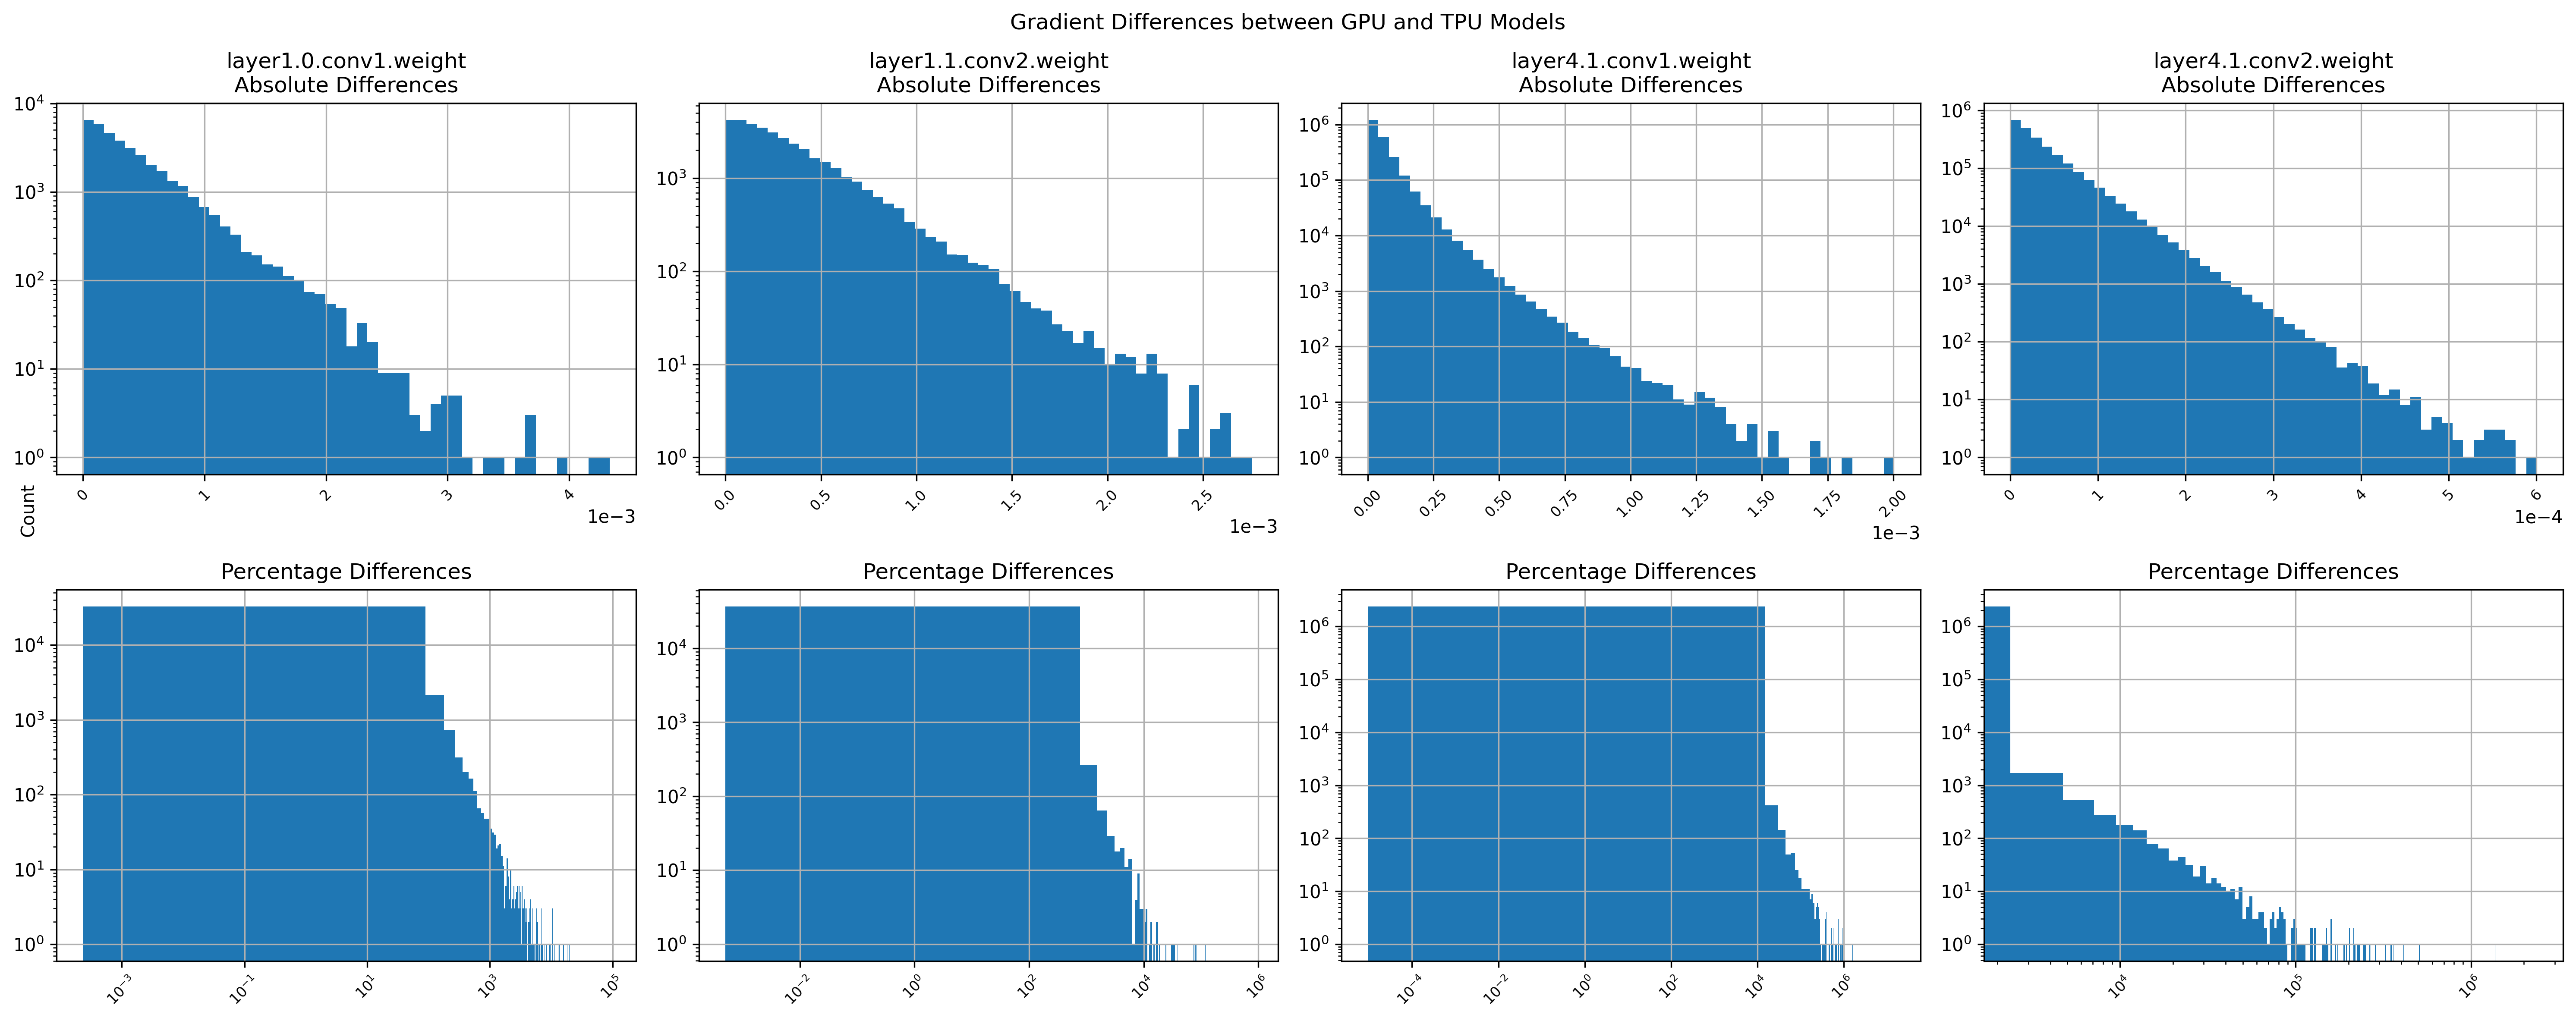


Stats for layer1.0.conv1.weight:
Absolute diff - mean: 0.000406, median: 0.000291, max: 0.004332
Percent diff - mean: 89.84%, median: 16.71%, max: 89233.37%

Stats for layer1.1.conv2.weight:
Absolute diff - mean: 0.000357, median: 0.000268, max: 0.002756
Percent diff - mean: 131.64%, median: 15.36%, max: 771971.25%

Stats for layer4.1.conv1.weight:
Absolute diff - mean: 0.000059, median: 0.000038, max: 0.002004
Percent diff - mean: 84.21%, median: 7.59%, max: 14782044.00%

Stats for layer4.1.conv2.weight:
Absolute diff - mean: 0.000036, median: 0.000024, max: 0.000600
Percent diff - mean: 42.14%, median: 4.49%, max: 2365062.00%
❌ Found differences in state dicts:
Maximum absolute difference: 0.008592
Maximum percentage difference: 3143372.000000%
Maximum median-of-layer percentage difference: 0.196190%

Layers with differences:
- conv1.weight: max diff = 0.002000, max pct diff = 9430.586%, med pct diff = 0.000%
- bn1.weight: max diff = 0.002000, max pct diff = 0.200%, med pct diff = 0

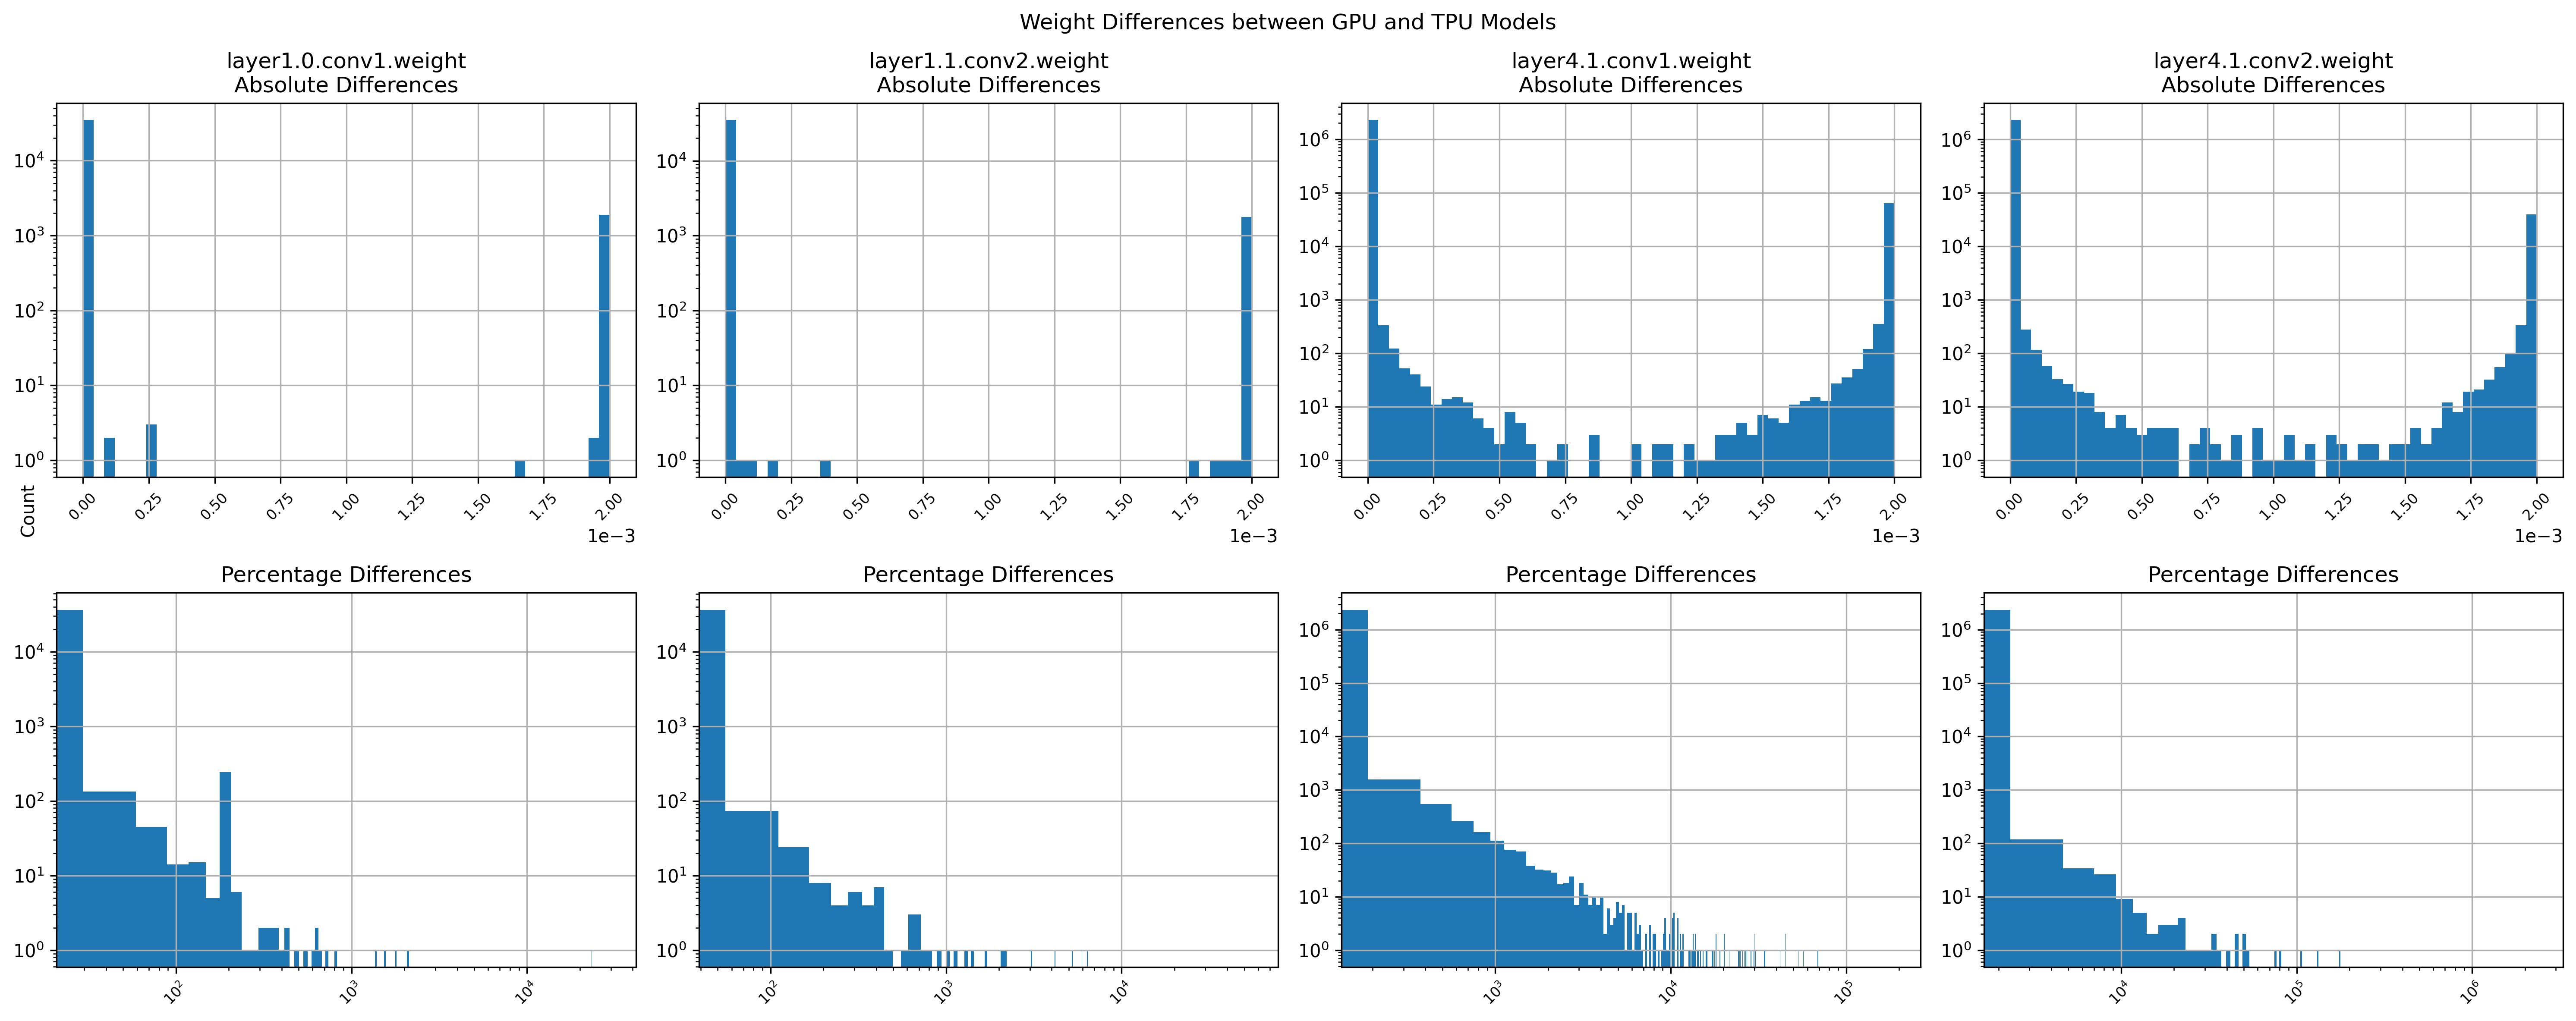


Stats for layer1.0.conv1.weight:
Absolute diff - mean: 0.000103, median: 0.000000, max: 0.002000
Percent diff - mean: 4.26%, median: 0.00%, max: 29526.23%

Stats for layer1.1.conv2.weight:
Absolute diff - mean: 0.000097, median: 0.000000, max: 0.002000
Percent diff - mean: 3.72%, median: 0.00%, max: 55302.90%

Stats for layer4.1.conv1.weight:
Absolute diff - mean: 0.000055, median: 0.000000, max: 0.002000
Percent diff - mean: 2.44%, median: 0.00%, max: 187902.47%

Stats for layer4.1.conv2.weight:
Absolute diff - mean: 0.000034, median: 0.000000, max: 0.002000
Percent diff - mean: 3.08%, median: 0.00%, max: 2332110.50%


In [16]:
test_train_one_step()

GPU Actor (PID: 3199541) using cuda (NVIDIA A100-SXM4-80GB)
TPU Actor (PID: 2943113) using xla:0 (v5litepod-8)
✅ GPU and TPU models have identical state dicts
GPU Loss: 7.150012
TPU Loss: 7.150189
❌ Found differences in grad dicts:
Maximum absolute difference: 0.011232
Maximum percentage difference: 7734676.500000%
Maximum median-of-layer percentage difference: 7.240509%

Layers with differences:
- conv1.weight: max diff = 0.011232, max pct diff = 355242.156%, med pct diff = 5.616%
- bn1.weight: max diff = 0.002915, max pct diff = 554.779%, med pct diff = 5.749%
- bn1.bias: max diff = 0.001582, max pct diff = 163.602%, med pct diff = 4.171%
- layer1.0.conv1.weight: max diff = 0.001346, max pct diff = 332997.531%, med pct diff = 5.525%
- layer1.0.bn1.weight: max diff = 0.002793, max pct diff = 479.942%, med pct diff = 7.241%
- layer1.0.bn1.bias: max diff = 0.001845, max pct diff = 382.107%, med pct diff = 5.571%
- layer1.0.conv2.weight: max diff = 0.001336, max pct diff = 83954.414%, me

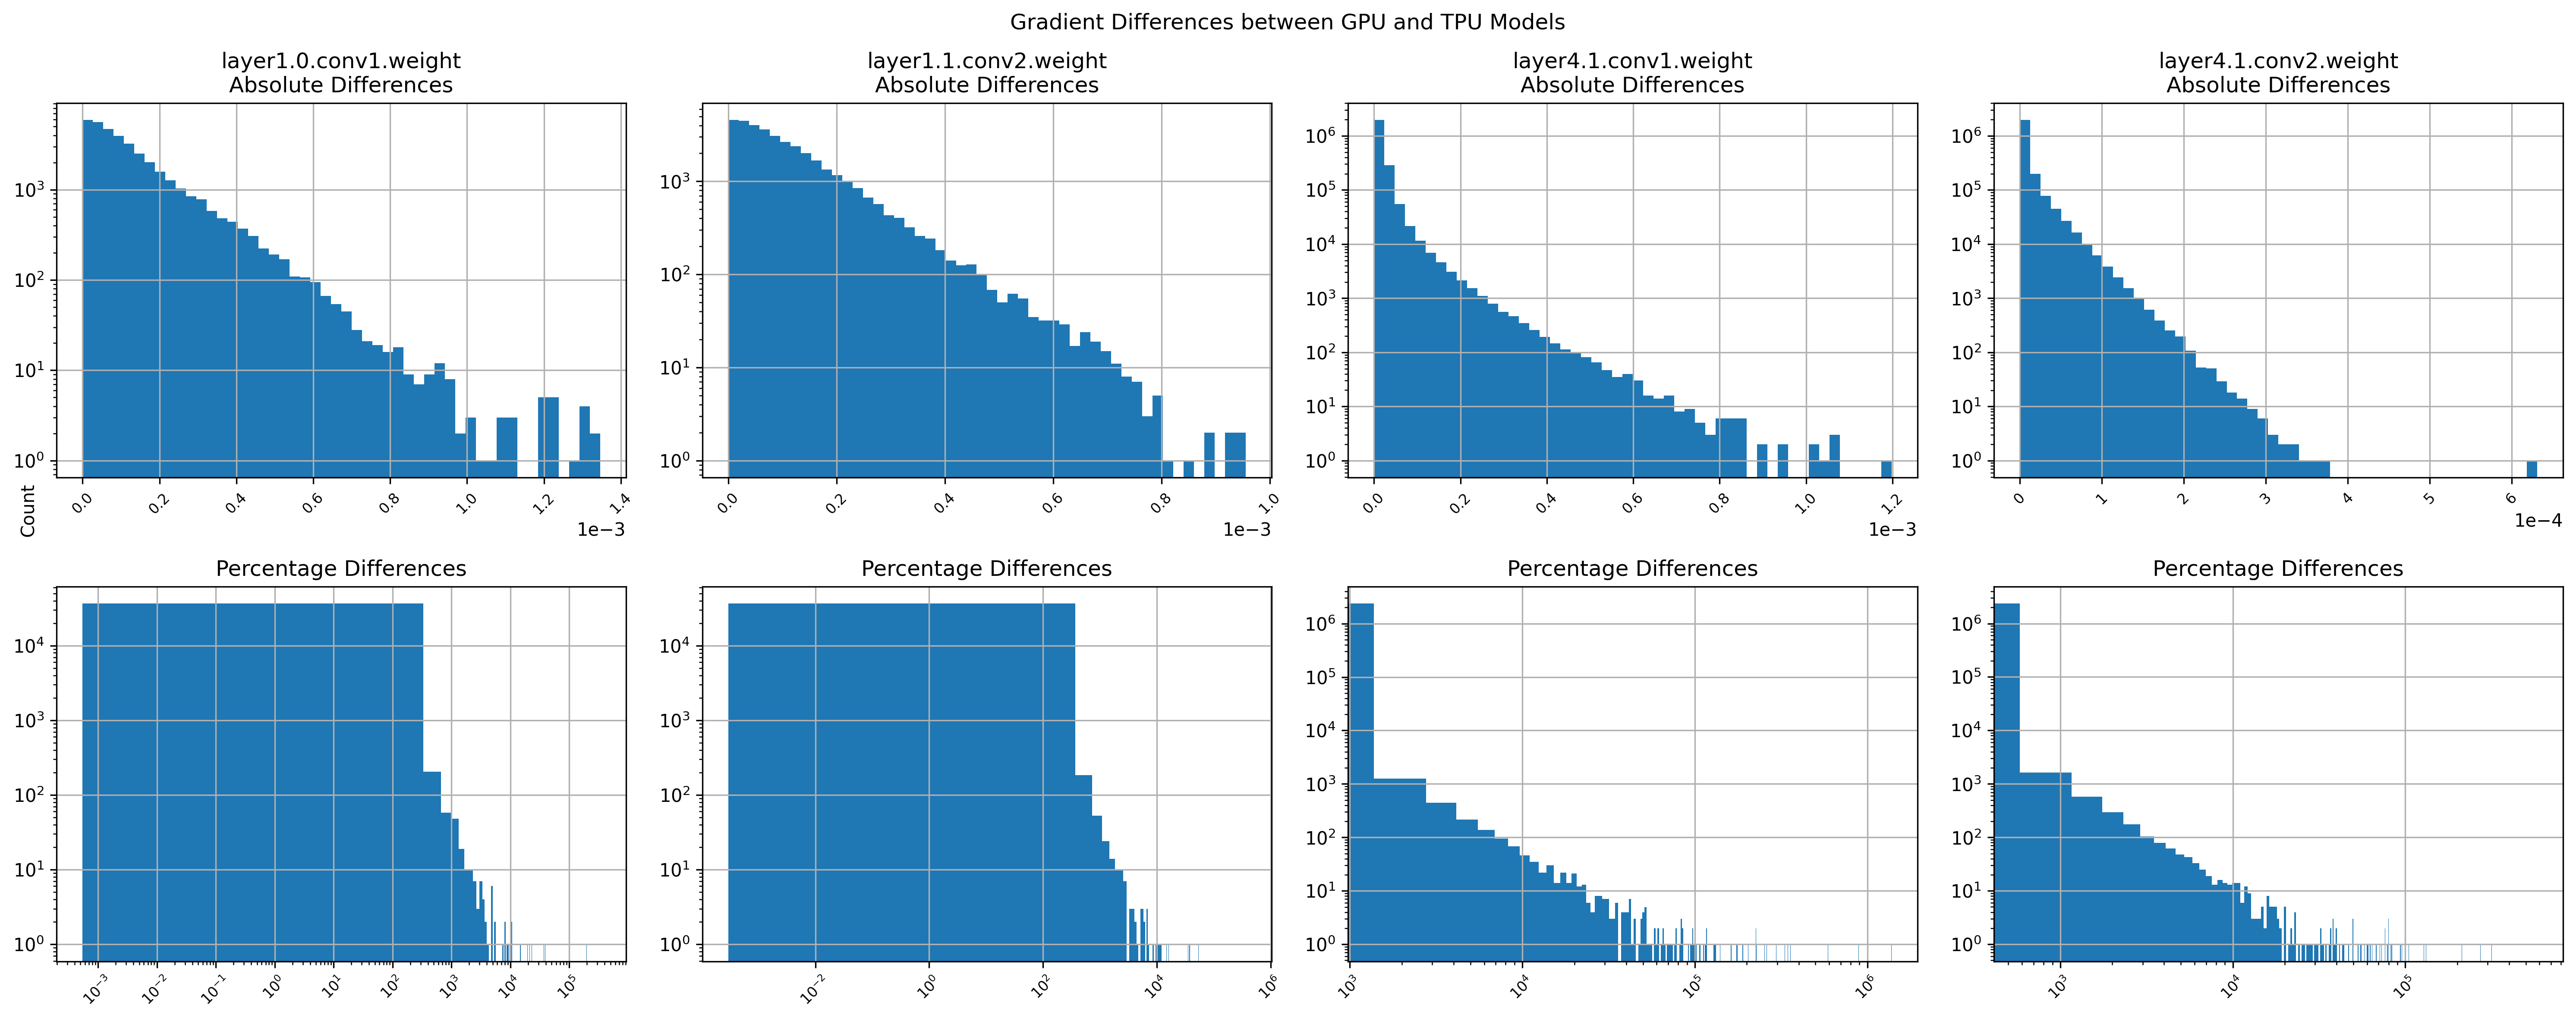


Stats for layer1.0.conv1.weight:
Absolute diff - mean: 0.000136, median: 0.000095, max: 0.001346
Percent diff - mean: 45.62%, median: 5.53%, max: 332997.53%

Stats for layer1.1.conv2.weight:
Absolute diff - mean: 0.000118, median: 0.000087, max: 0.000956
Percent diff - mean: 47.73%, median: 5.05%, max: 366525.22%

Stats for layer4.1.conv1.weight:
Absolute diff - mean: 0.000016, median: 0.000010, max: 0.001198
Percent diff - mean: 21.39%, median: 1.93%, max: 1379735.00%

Stats for layer4.1.conv2.weight:
Absolute diff - mean: 0.000009, median: 0.000004, max: 0.000631
Percent diff - mean: 10.52%, median: 0.75%, max: 581854.19%
❌ Found differences in state dicts:
Maximum absolute difference: 0.002562
Maximum percentage difference: 2944510.750000%
Maximum median-of-layer percentage difference: 0.027371%

Layers with differences:
- conv1.weight: max diff = 0.002000, max pct diff = 162.097%, med pct diff = 0.000%
- bn1.weight: max diff = 0.002000, max pct diff = 0.200%, med pct diff = 0.000%

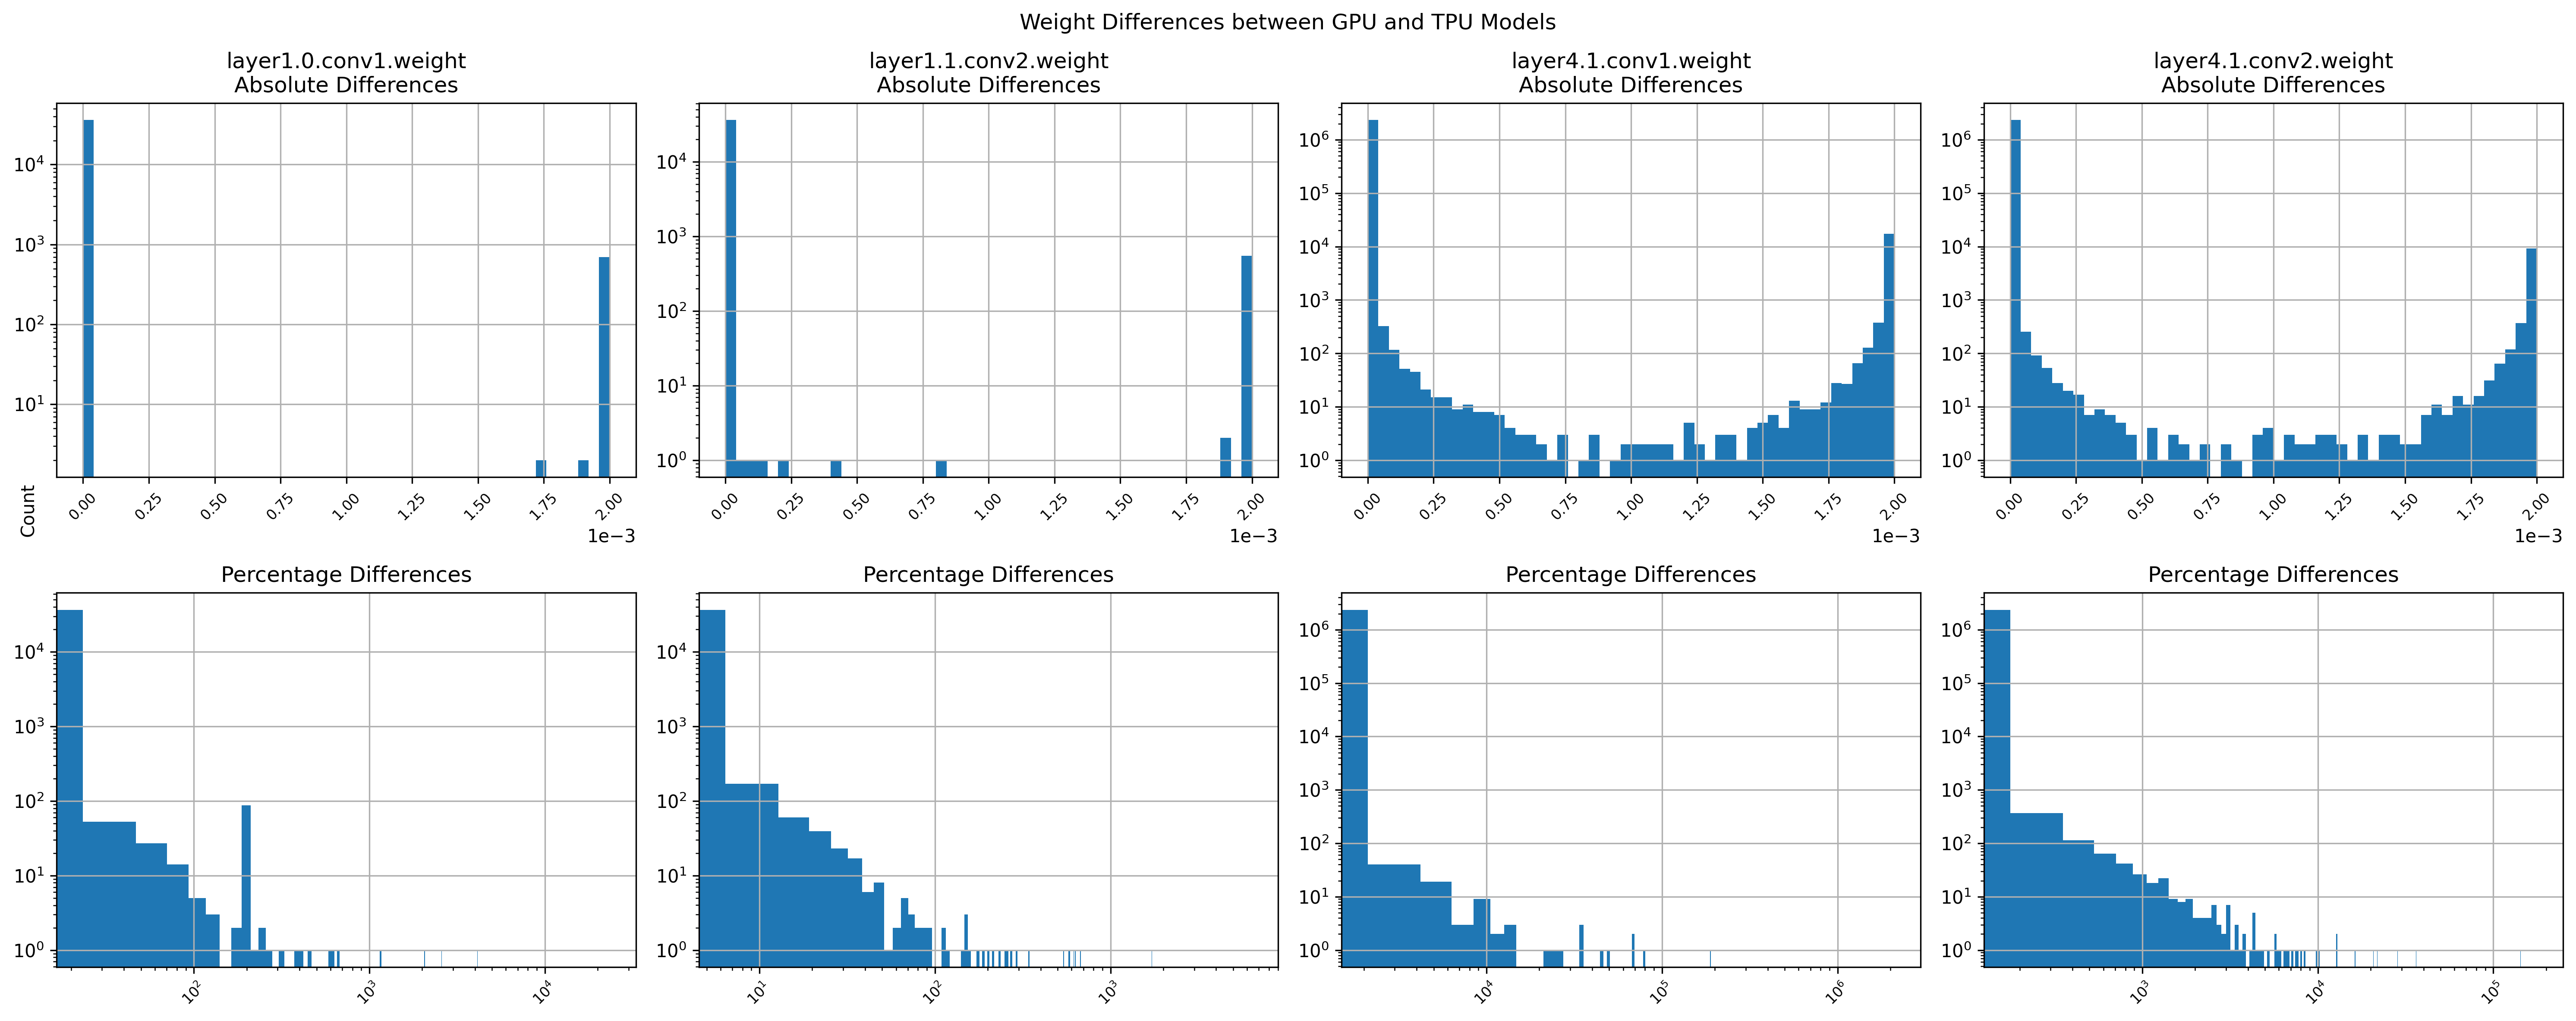


Stats for layer1.0.conv1.weight:
Absolute diff - mean: 0.000038, median: 0.000000, max: 0.002000
Percent diff - mean: 1.75%, median: 0.00%, max: 23377.28%

Stats for layer1.1.conv2.weight:
Absolute diff - mean: 0.000030, median: 0.000000, max: 0.002000
Percent diff - mean: 0.69%, median: 0.00%, max: 6399.89%

Stats for layer4.1.conv1.weight:
Absolute diff - mean: 0.000015, median: 0.000000, max: 0.002000
Percent diff - mean: 1.72%, median: 0.00%, max: 2107696.50%

Stats for layer4.1.conv2.weight:
Absolute diff - mean: 0.000008, median: 0.000000, max: 0.002000
Percent diff - mean: 0.65%, median: 0.00%, max: 176652.14%


In [17]:
# Let's test the high precision settings.
gpu_actor, tpu_actor = reset_all_actors(gpu_actor, tpu_actor)
ray.get(tpu_actor.set_matmul_precision.remote('high'))
test_train_one_step()

GPU Actor (PID: 3202320) using cuda (NVIDIA A100-SXM4-80GB)
TPU Actor (PID: 2948737) using xla:0 (v5litepod-8)
✅ GPU and TPU models have identical state dicts
GPU Loss: 7.150012
TPU Loss: 7.150187
❌ Found differences in grad dicts:
Maximum absolute difference: 0.011495
Maximum percentage difference: 5858563.500000%
Maximum median-of-layer percentage difference: 7.139750%

Layers with differences:
- conv1.weight: max diff = 0.011495, max pct diff = 422713.781%, med pct diff = 5.494%
- bn1.weight: max diff = 0.002731, max pct diff = 610.851%, med pct diff = 5.048%
- bn1.bias: max diff = 0.001780, max pct diff = 231.416%, med pct diff = 3.852%
- layer1.0.conv1.weight: max diff = 0.001323, max pct diff = 221148.406%, med pct diff = 5.367%
- layer1.0.bn1.weight: max diff = 0.002843, max pct diff = 452.787%, med pct diff = 7.140%
- layer1.0.bn1.bias: max diff = 0.001942, max pct diff = 231.244%, med pct diff = 5.132%
- layer1.0.conv2.weight: max diff = 0.001366, max pct diff = 76820.008%, me

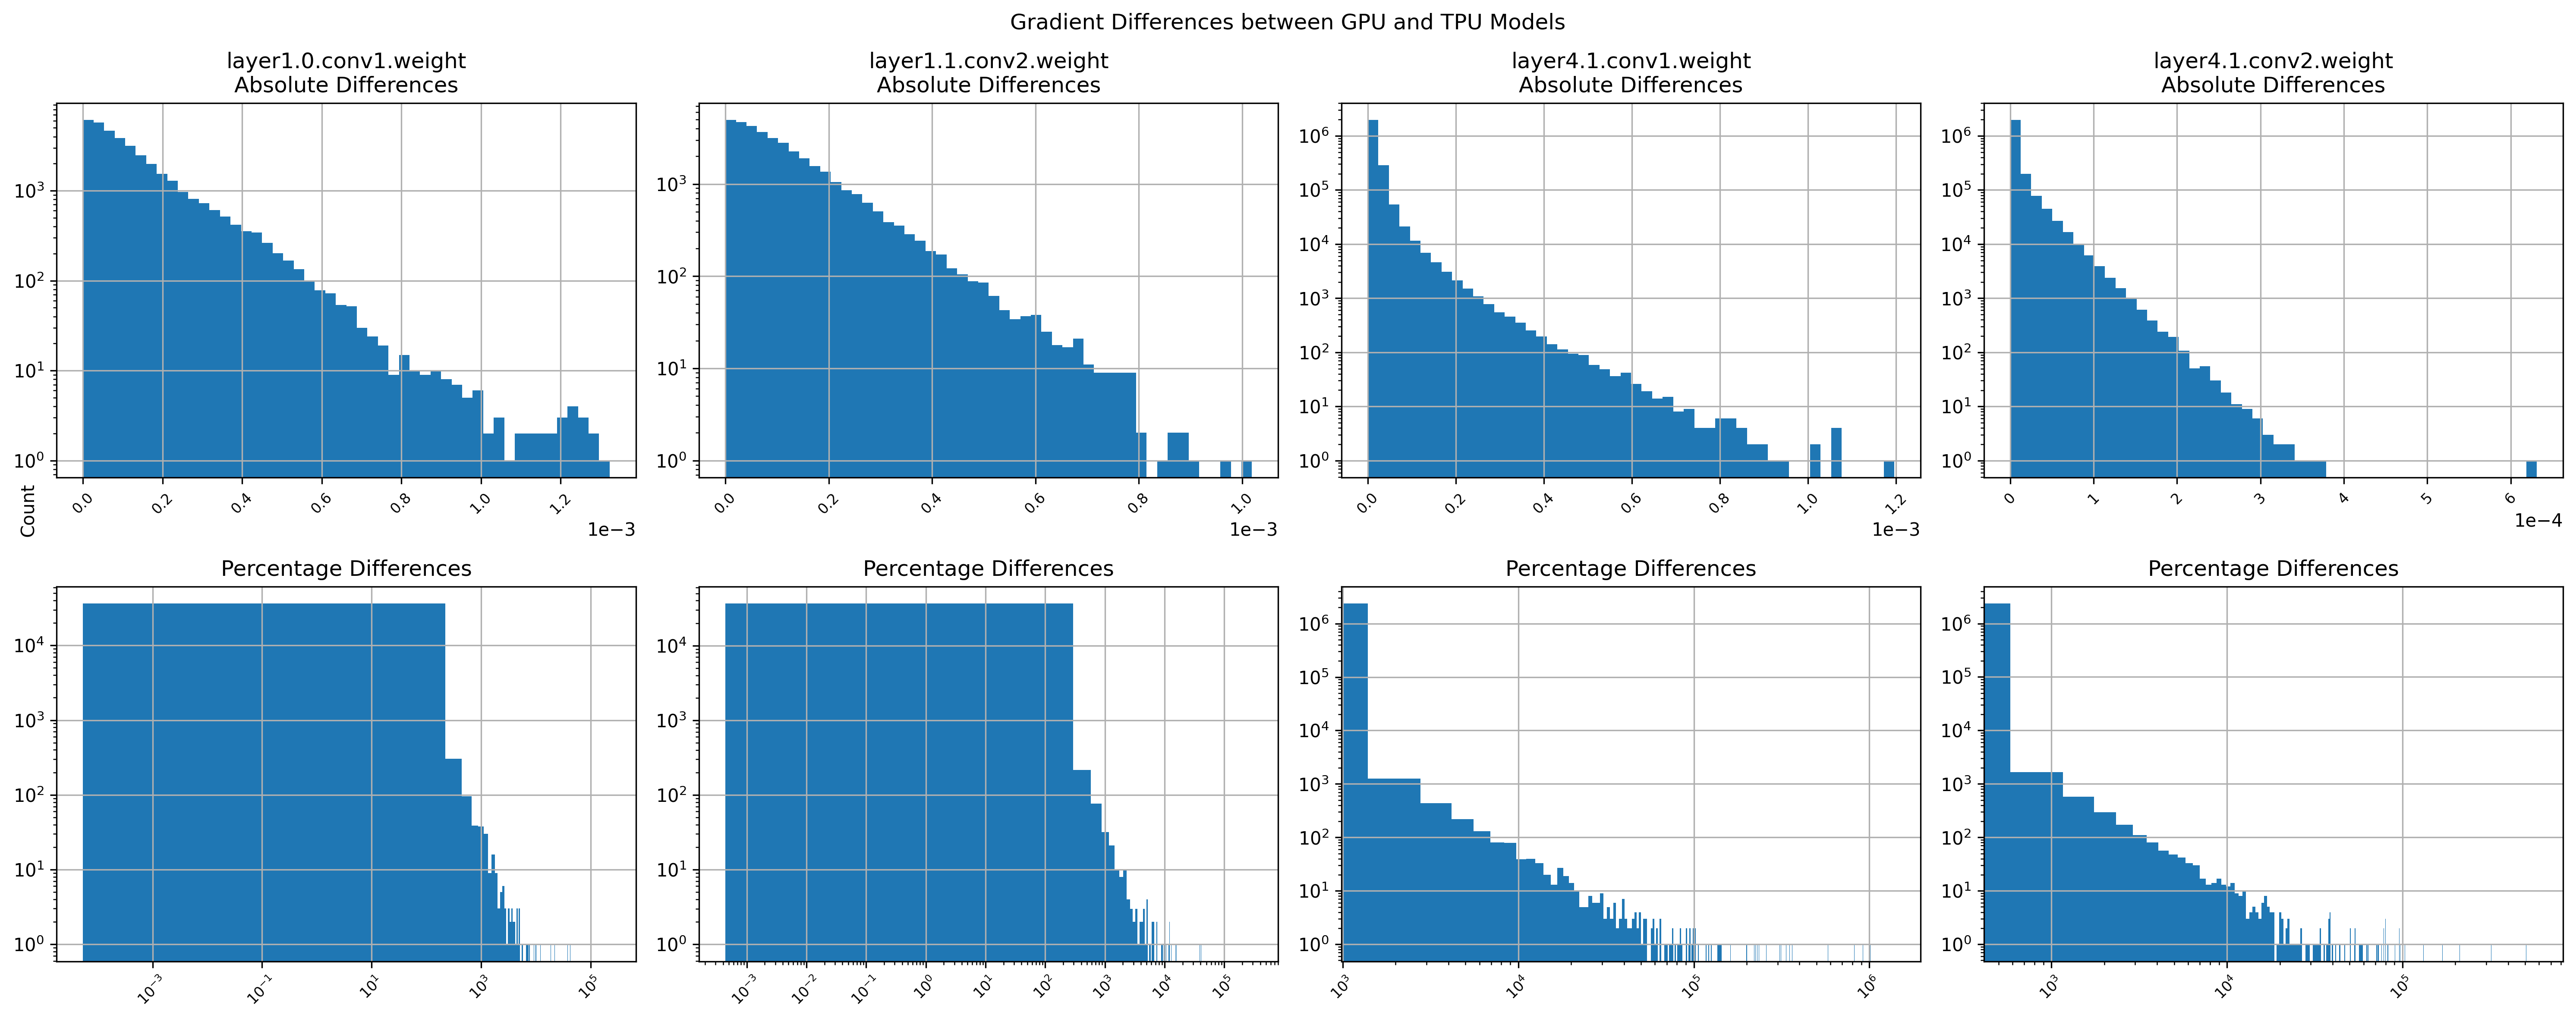


Stats for layer1.0.conv1.weight:
Absolute diff - mean: 0.000133, median: 0.000092, max: 0.001323
Percent diff - mean: 41.67%, median: 5.37%, max: 221148.42%

Stats for layer1.1.conv2.weight:
Absolute diff - mean: 0.000117, median: 0.000087, max: 0.001019
Percent diff - mean: 45.85%, median: 5.01%, max: 291342.94%

Stats for layer4.1.conv1.weight:
Absolute diff - mean: 0.000016, median: 0.000010, max: 0.001196
Percent diff - mean: 21.79%, median: 1.92%, max: 1388185.25%

Stats for layer4.1.conv2.weight:
Absolute diff - mean: 0.000009, median: 0.000004, max: 0.000631
Percent diff - mean: 10.63%, median: 0.76%, max: 581696.50%
❌ Found differences in state dicts:
Maximum absolute difference: 0.002226
Maximum percentage difference: 2944505.750000%
Maximum median-of-layer percentage difference: 0.027000%

Layers with differences:
- conv1.weight: max diff = 0.002000, max pct diff = 230.462%, med pct diff = 0.000%
- bn1.weight: max diff = 0.002000, max pct diff = 0.200%, med pct diff = 0.000%

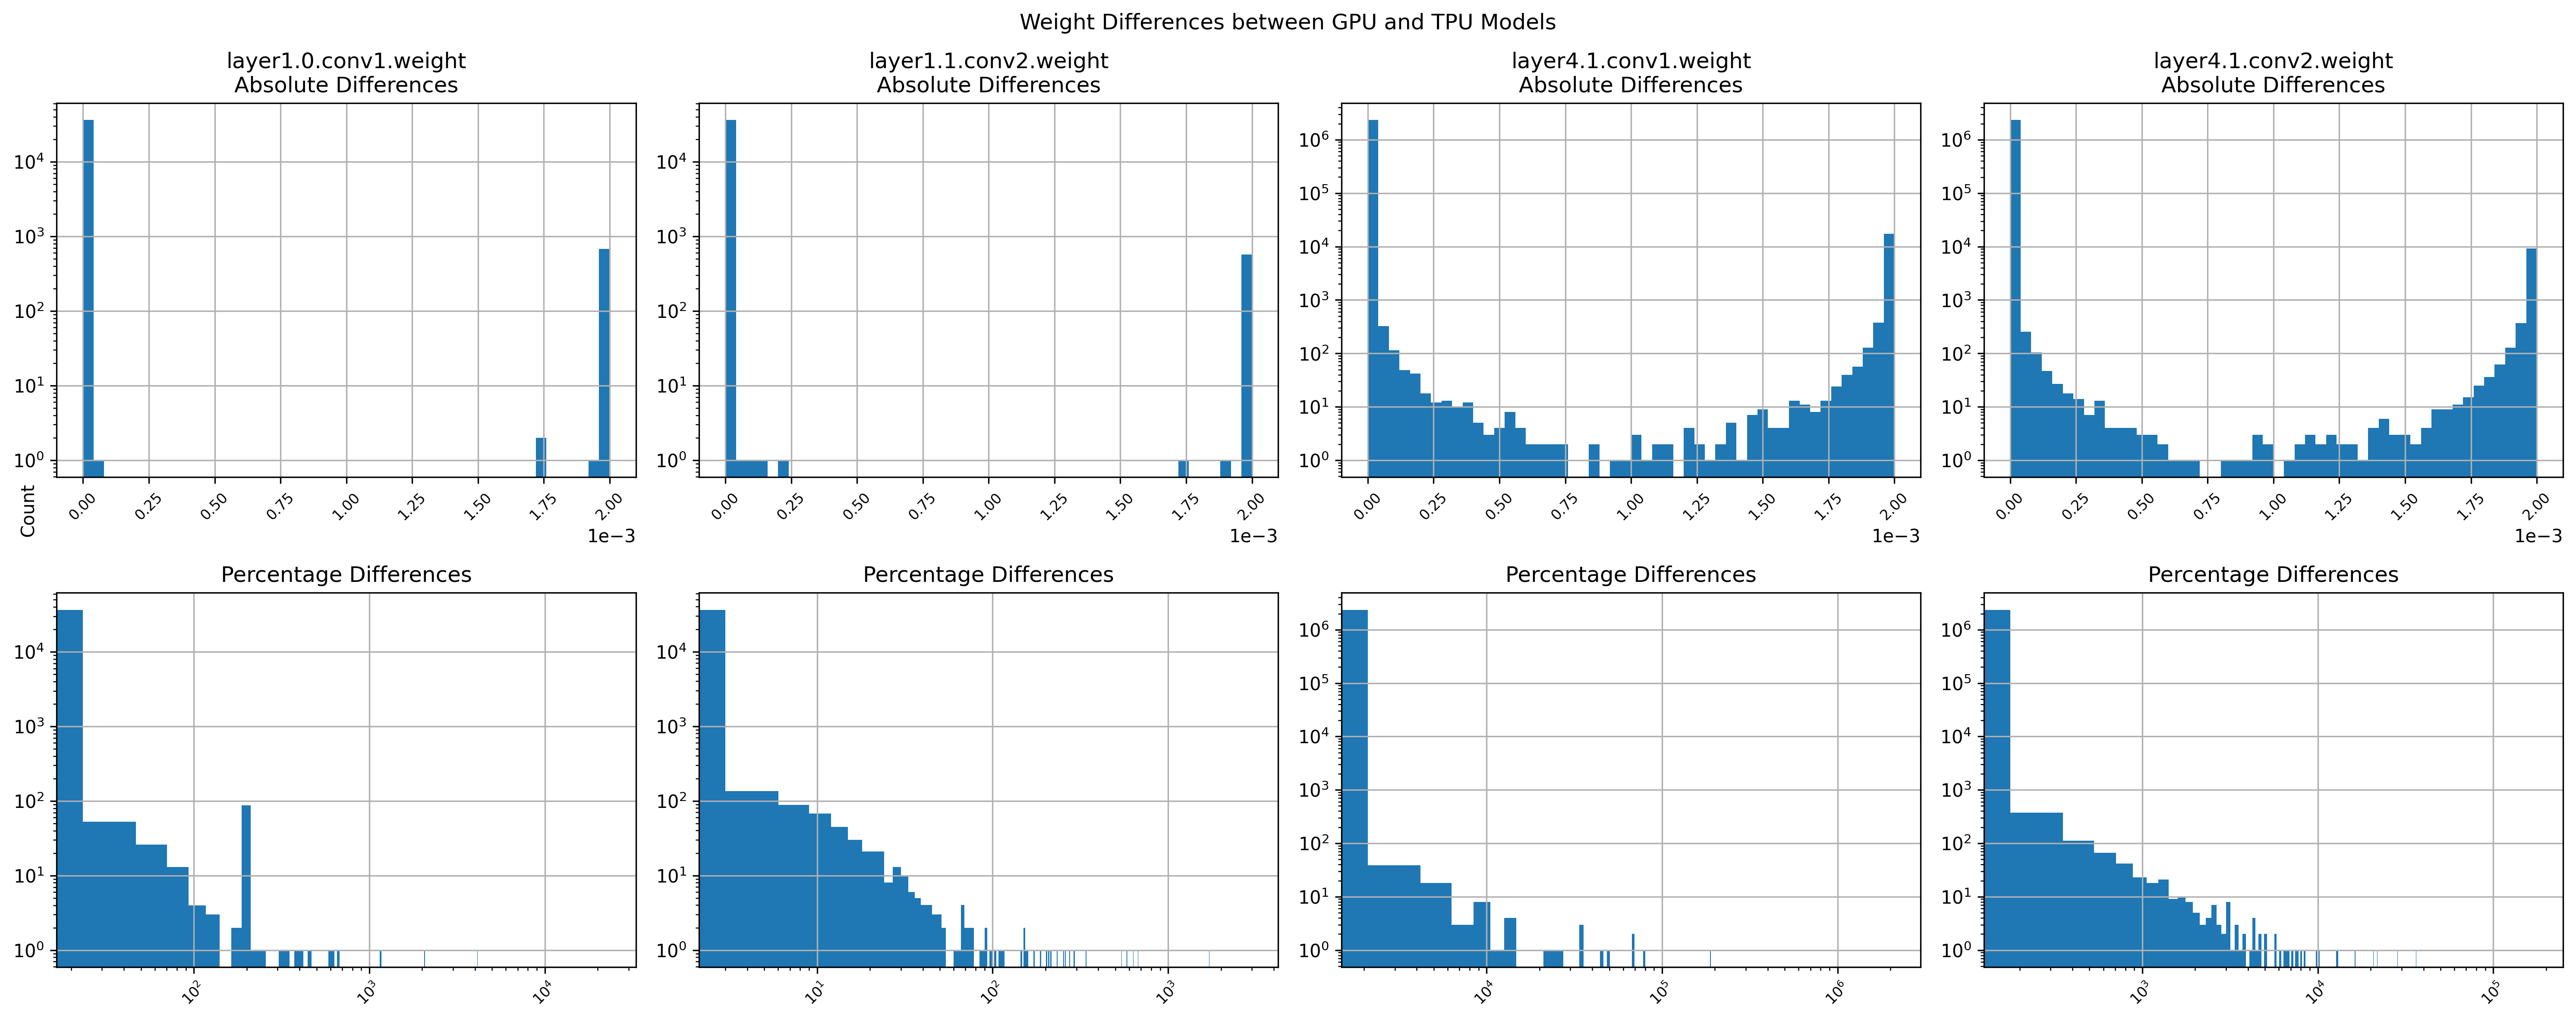


Stats for layer1.0.conv1.weight:
Absolute diff - mean: 0.000037, median: 0.000000, max: 0.002000
Percent diff - mean: 1.67%, median: 0.00%, max: 23376.87%

Stats for layer1.1.conv2.weight:
Absolute diff - mean: 0.000031, median: 0.000000, max: 0.002000
Percent diff - mean: 0.52%, median: 0.00%, max: 3003.18%

Stats for layer4.1.conv1.weight:
Absolute diff - mean: 0.000015, median: 0.000000, max: 0.002000
Percent diff - mean: 1.71%, median: 0.00%, max: 2105067.00%

Stats for layer4.1.conv2.weight:
Absolute diff - mean: 0.000008, median: 0.000000, max: 0.002000
Percent diff - mean: 0.65%, median: 0.00%, max: 176656.50%


In [18]:
# Finally, test the highest precision settings.
gpu_actor, tpu_actor = reset_all_actors(gpu_actor, tpu_actor)
ray.get(tpu_actor.set_matmul_precision.remote('highest'))
test_train_one_step()

## Single step training result analysis

Let's break down the evidence from the single-step analysis in the context of
searching for potential PyTorch/XLA bugs versus expected numerical variations.

**Arguments for Expected Numerical Variation:**

1.  **Hardware & Precision:** This is the most significant factor. We are
    comparing an NVIDIA A100 using TF32 against a TPU v5 lite configured for
    `HIGHEST` matmul precision (emulating FP32 via BF16).
    * **TF32 (GPU):** Uses FP32's 8-bit exponent but FP16's 10-bit mantissa for
      matrix multiplications. It's a performance optimization that sacrifices
      some precision in matmuls while keeping the FP32 range. Other operations
      likely remain FP32.
    * **BF16-emulated FP32 (TPU):** BF16 natively has FP32's 8-bit exponent but
      only a 7-bit mantissa (less precise than TF32 or FP16). Emulating FP32
      involves multiple BF16 operations. Even with this highest precision
      setting, the underlying accumulation methods and the specifics of how XLA
      compiles the PyTorch operations can differ significantly from the GPU's
      CUDA/cuDNN execution.
    * **In summary:** We are fundamentally running on two different numerical
      backbones. It's almost guaranteed *not* to produce bit-identical results,
      especially after complex operations like a backward pass.

2.  **Loss Closeness:** The losses calculated after the forward pass ($7.150012$
    vs $7.150187$) are extremely close ($<0.003\%$ difference). This suggests
    the forward pass computations are numerically quite stable between the
    platforms.

3.  **Gradient Differences:** While the gradients show larger differences (up to
    ~7% median relative difference in one layer), this is somewhat expected. The
    backward pass involves many more chained operations (matrix multiplies,
    additions, non-linearities) than the forward pass, providing more
    opportunities for small precision differences to accumulate and propagate.
    Operations like gradient calculations through batch norm can also be
    sensitive.

4.  **Max Percentage Difference Artifacts:** The huge maximum percentage
    differences are very likely misleading artifacts caused by dividing small
    absolute differences by near-zero gradient values on the GPU, rather than
    indicating a massive systemic error.

5.  **Weight Update Smoothing:** The fact that the weight differences *after*
    the (Adam) update step were much smaller (max median ~0.03%) than the
    gradient differences (~7%) makes sense. The optimizer averages gradients (in
    Adam's case, exponentially weighted moving averages) and scales them by a
    learning rate ($0.001$), which tends to smooth out some of the instantaneous
    gradient noise or variation.

**Arguments for Potential Bug (or at least, Cause for Concern):**

1.  **Gradient Median Percentage Difference:** A ~7% median difference in
    gradients for *some* layers, while potentially explainable by precision
    differences, is still notable. If this level of difference persists or
    grows, it *could* theoretically steer the optimization path differently
    enough to impact convergence. It indicates a non-negligible difference in
    the "average" update direction computed for those parameters within that
    step.
2.  **Adam State:** Adam maintains internal state (first and second moment
    estimates). Consistent differences in gradients, even if relatively small on
    average, will lead to divergence in these optimizer states over time, which
    directly impacts the weight updates.

**Conclusion:**

Based *only* on this single-step analysis, the observed differences **do not
strongly indicate a definitive software bug** in PyTorch/XLA. They appear more
consistent with the expected numerical variations arising from running complex
floating-point calculations on different hardware architectures with different
precision characteristics (TF32 vs. BF16-emulated FP32) and compilation paths
(CUDA vs. XLA).

The ~7% maximum median gradient difference is the most interesting data point,
but it's not high enough on its own to point to a bug.

We have established that the instantaneous update directions *can* differ by a
few percent on average in some layers. Now, we need to see if the optimizer
(Adam) and the training dynamics are robust enough to handle this, or if these
differences accumulate and lead the TPU training astray.

If the convergence tests *do* show a significant problem on the TPU, *then* this
detailed single-step analysis becomes extremely valuable data to revisit. We'll
know that numerical discrepancies, particularly in gradient calculations, emerge
right from the first step and could be a contributing factor worthy of deeper
investigation. 

Let's start training.

In [14]:
import gc
gc.collect()

201

# Train the model on both GPU and TPU

Test training a few epochs with the same unshuffled data on both GPU and TPU.

In [ ]:
from tqdm import tqdm
gpu_actor, tpu_actor = reset_all_actors(gpu_actor, tpu_actor=None)
ray.get(tpu_actor.set_matmul_precision.remote('default'))
ray.get(gpu_actor.init_optimizer.remote(0.001))
ray.get(tpu_actor.init_optimizer.remote(0.001))

gpu_losses = []
tpu_losses = []
for epoch in range(300):
  progress = tqdm(zip(gpu_actor.run_training_epoch.remote(), tpu_actor.run_training_epoch.remote(), strict=True))
  for gpu_stuff, tpu_stuff in progress:
    i, gpu_loss, gpu_data_hash = ray.get(gpu_stuff)
    j, tpu_loss, tpu_data_hash = ray.get(tpu_stuff)
    if i != j:
      raise ValueError("Iteration numbers do not match between GPU and TPU actors!")
    if gpu_data_hash != tpu_data_hash:
      raise ValueError("Data hashes do not match between GPU and TPU actors!")
    gpu_losses.append(gpu_loss)
    tpu_losses.append(tpu_loss)
    progress.set_postfix_str(f"Epoch {epoch} Iter {i} | GPU Loss: {gpu_loss:.6f} | TPU Loss: {tpu_loss:.6f}")

GPU Actor (PID: 3716159) using cuda (NVIDIA A100-SXM4-80GB)
TPU Actor (PID: 272690) using xla:0 (v5litepod-8)
✅ GPU and TPU models have identical state dicts


39it [01:43,  2.64s/it, Epoch 0 Iter 38 | GPU Loss: 8.651816 | TPU Loss: 8.512910]
39it [01:23,  2.13s/it, Epoch 1 Iter 38 | GPU Loss: 7.773707 | TPU Loss: 8.093145]
39it [01:22,  2.11s/it, Epoch 2 Iter 38 | GPU Loss: 7.300467 | TPU Loss: 7.340773]
39it [01:22,  2.12s/it, Epoch 3 Iter 38 | GPU Loss: 7.133297 | TPU Loss: 7.111354]
39it [01:22,  2.13s/it, Epoch 4 Iter 38 | GPU Loss: 7.038480 | TPU Loss: 7.016230]
39it [01:22,  2.11s/it, Epoch 5 Iter 38 | GPU Loss: 6.982750 | TPU Loss: 6.980065]
39it [01:23,  2.14s/it, Epoch 6 Iter 38 | GPU Loss: 6.935679 | TPU Loss: 6.929566]
39it [01:22,  2.12s/it, Epoch 7 Iter 38 | GPU Loss: 6.912610 | TPU Loss: 6.933066]
39it [01:22,  2.12s/it, Epoch 8 Iter 38 | GPU Loss: 6.872121 | TPU Loss: 6.944148]
39it [01:23,  2.15s/it, Epoch 9 Iter 38 | GPU Loss: 6.860251 | TPU Loss: 6.908191]
39it [01:22,  2.11s/it, Epoch 10 Iter 38 | GPU Loss: 6.806093 | TPU Loss: 6.889310]
39it [01:29,  2.29s/it, Epoch 11 Iter 38 | GPU Loss: 6.896142 | TPU Loss: 6.908757]
39

## Experimental observations

Below is a training run showing the train loss without eval or validation.

There are loss spikes in both TPU and GPU. Furthermore, within one epoch, the
learning rate increases and then decreases. An earlier run with seed 0 also
converges slower than this run with seed 42, suggesting that the results are
sensitive to the RNG seed.

This suggests that the learning rate is too high. Besides that, both TPU and GPU
can overfit to a small dataset without issues.

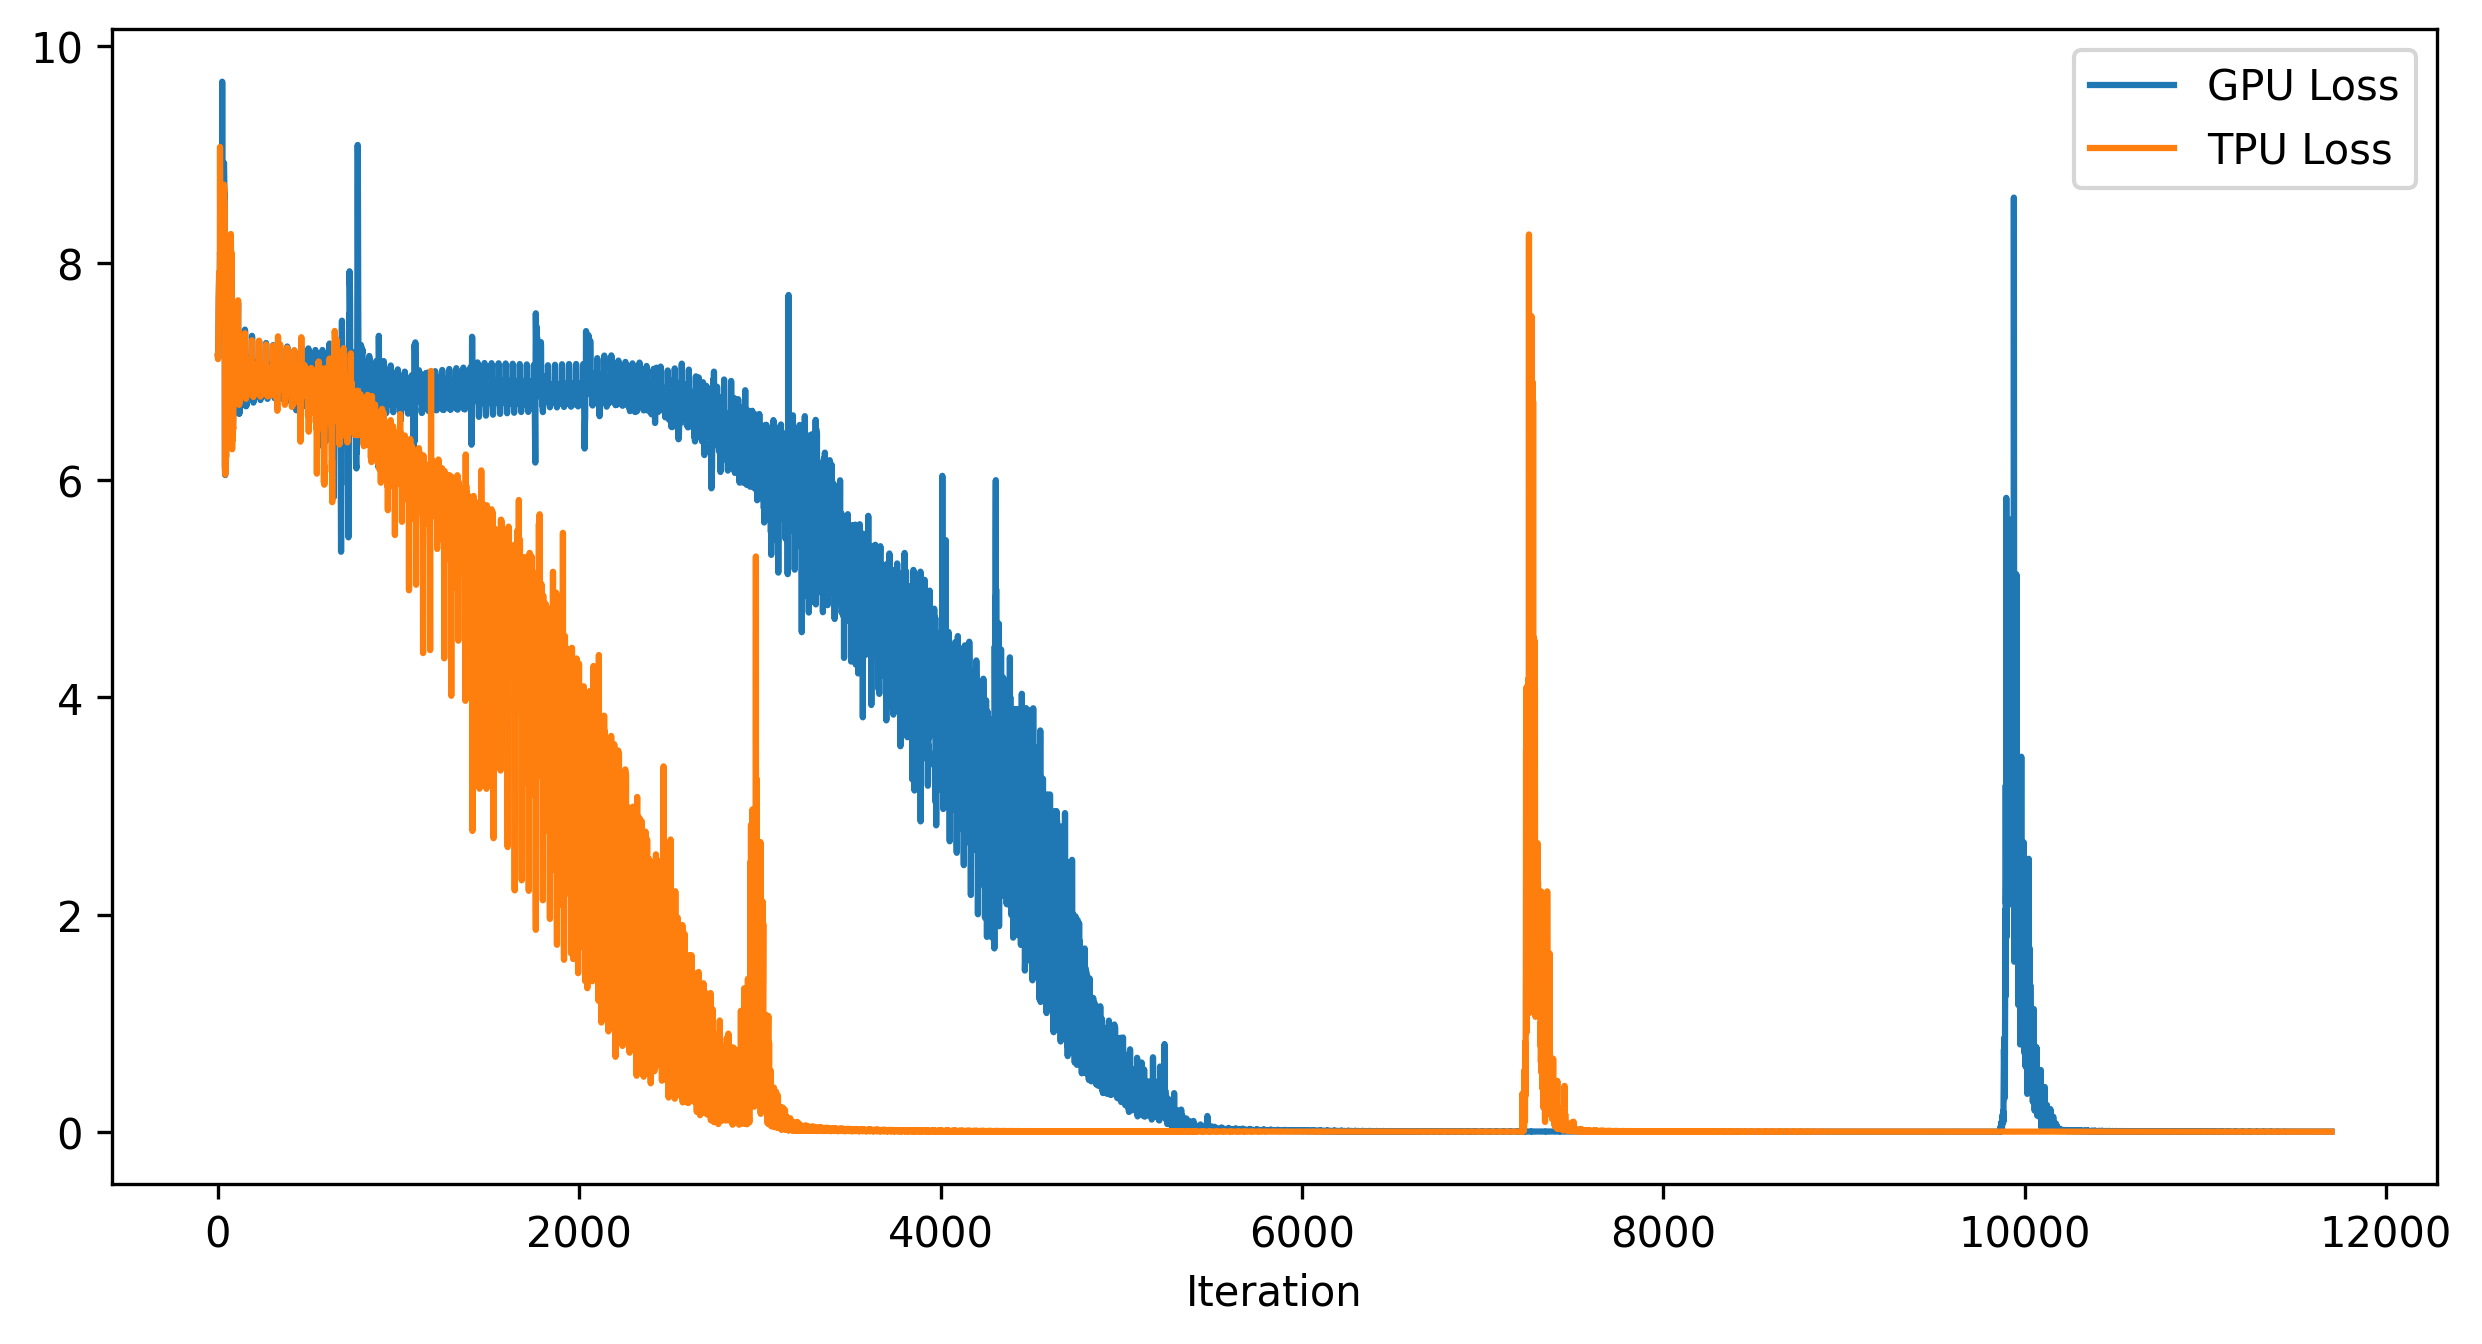

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(gpu_losses, label='GPU Loss')
plt.plot(tpu_losses, label='TPU Loss')
plt.xlabel('Iteration') 
plt.legend()
plt.show()

## Convergence test

Now let's run a proper training run with:

- Learning rate: `1e-4` (smaller than the existing `1e-3`)
- Batch size: 512 (unchanged)
- Training set: `flwrlabs/celeba/train`
- Validation set (used to compute validation accuracy): `flwrlabs/celeba/valid`
- Measure:
  - val-loss
  - val-top1-acc
- Final evaluation: `flwrlabs/celeba/test`

If TPU is materially worse on val-top1-acc with same LR/batchsize, that's a
material datapoint and we probably want to bring it back to the TPU team to see
if that's also expected behavior.

In [20]:
from tqdm import tqdm
actor_resetter = ActorResetter(num_classes=8192)
gpu_actor, tpu_actor = reset_all_actors(gpu_actor, tpu_actor=None, actor_resetter=actor_resetter)
ray.get(tpu_actor.set_matmul_precision.remote('default'))
ray.get(gpu_actor.init_optimizer.remote(1e-4))
ray.get(tpu_actor.init_optimizer.remote(1e-4))

BATCH_SIZE = 512
training_split = 'train'

# TODO: run validation top-1 accuracy

gpu_losses = []
tpu_losses = []
for epoch in range(40):
  gpu_stream = gpu_actor.run_training_epoch.remote(batch_size=BATCH_SIZE, training_split=training_split, dataloader_seed=epoch)
  tpu_stream = tpu_actor.run_training_epoch.remote(batch_size=BATCH_SIZE, training_split=training_split, dataloader_seed=epoch)
  progress = tqdm(zip(gpu_stream, tpu_stream, strict=True))
  for gpu_stuff, tpu_stuff in progress:
    i, gpu_loss, gpu_data_hash = ray.get(gpu_stuff)
    j, tpu_loss, tpu_data_hash = ray.get(tpu_stuff)
    if i != j:
      raise ValueError("Iteration numbers do not match between GPU and TPU actors!")
    if gpu_data_hash != tpu_data_hash:
      raise ValueError("Data hashes do not match between GPU and TPU actors!")
    gpu_losses.append(gpu_loss)
    tpu_losses.append(tpu_loss)
    progress.set_postfix_str(f"Epoch {epoch} Iter {i} | GPU Loss: {gpu_loss:.6f} | TPU Loss: {tpu_loss:.6f}")


GPU Actor (PID: 3541284) using cuda (NVIDIA A100-SXM4-80GB)
TPU Actor (PID: 1012284) using xla:0 (v5litepod-8)
✅ GPU and TPU models have identical state dicts


317it [07:52,  1.49s/it, Epoch 0 Iter 316 | GPU Loss: 8.338587 | TPU Loss: 8.362222]
317it [07:39,  1.45s/it, Epoch 1 Iter 316 | GPU Loss: 7.291454 | TPU Loss: 7.309406]
317it [07:42,  1.46s/it, Epoch 2 Iter 316 | GPU Loss: 6.289425 | TPU Loss: 6.292647]
317it [07:39,  1.45s/it, Epoch 3 Iter 316 | GPU Loss: 5.364392 | TPU Loss: 5.359335]
317it [07:33,  1.43s/it, Epoch 4 Iter 316 | GPU Loss: 4.512930 | TPU Loss: 4.487593]
317it [07:37,  1.44s/it, Epoch 5 Iter 316 | GPU Loss: 3.727218 | TPU Loss: 3.707355]
317it [07:42,  1.46s/it, Epoch 6 Iter 316 | GPU Loss: 3.046453 | TPU Loss: 3.027038]
317it [07:41,  1.46s/it, Epoch 7 Iter 316 | GPU Loss: 2.461653 | TPU Loss: 2.452164]
317it [07:36,  1.44s/it, Epoch 8 Iter 316 | GPU Loss: 1.978343 | TPU Loss: 1.973676]
317it [07:34,  1.43s/it, Epoch 9 Iter 316 | GPU Loss: 1.580828 | TPU Loss: 1.577016]
317it [07:39,  1.45s/it, Epoch 10 Iter 316 | GPU Loss: 1.251796 | TPU Loss: 1.243442]
317it [07:39,  1.45s/it, Epoch 11 Iter 316 | GPU Loss: 0.980083 

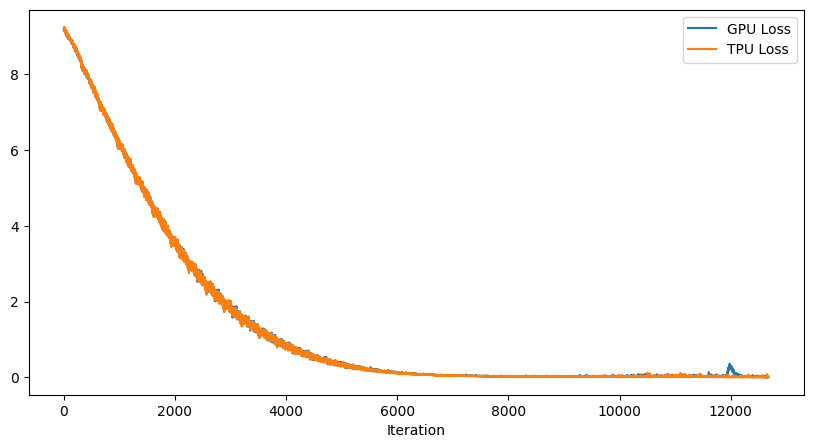

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(gpu_losses, label='GPU Loss')
plt.plot(tpu_losses, label='TPU Loss')
plt.xlabel('Iteration') 
plt.legend()
plt.show()